# **Import** **packages**

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import os
from scipy.io import arff
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import time

np.random.seed(66)

# **Load and visualize datasets**

In [ ]:
# Load datasets
from google.colab import drive
drive.mount('/content/gdrive')
hepatitis = pd.read_csv("/content/gdrive/My Drive/COMP 551/hepatitis.csv", names = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY'])
# hepatitis

messidor_data = arff.loadarff("/content/gdrive/My Drive/COMP 551/messidor_features.arff")
messidor = pd.DataFrame(messidor_data[0])
# messidor

# Remove any samples with missing attributes represented by "?"
hepatitis = hepatitis[~hepatitis.eq('?').any(1)]
ri = pd.RangeIndex(stop = hepatitis.shape[0])
hepatitis.index = ri
# Since some columns are of type String, convert them to numeric values
hepatitis = hepatitis.apply(pd.to_numeric)
# hepatitis

# Change the column names of the messidor dataframe
messidor.columns = ['Quality', 'Abnormality', 'MA1', 'MA2', 'MA3', 'MA4', 'MA5', 'MA6', 'Exudate1', 'Exudate2', 'Exudate3', 'Exudate4', 'Exudate5', 'Exudate6', 'Exudate7', 'Exudate8', 'Distance', 'Optic_Disk', 'BiClass', 'Class']
# The messidor dataset does not have samples with missing attributes
# messidor = messidor[~messidor.eq('?').any(1)]

# Remove any obviously malformed attibute values
# For most of these features, values are either legal or within a reasonable range
hepatitis_bin = hepatitis[['Class', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY']]
hepatitis = hepatitis[hepatitis_bin.isin([1, 2]).all(1)]
hepatitis = hepatitis[(hepatitis.AGE >= 10) & (hepatitis.AGE <= 80)]
hepatitis = hepatitis[(hepatitis.BILIRUBIN >= 0.25) & (hepatitis.BILIRUBIN <= 5.0)]
hepatitis = hepatitis[(hepatitis.ALK_PHOSPHATE >= 25) & (hepatitis.ALK_PHOSPHATE <= 300)]
hepatitis = hepatitis[(hepatitis.SGOT >= 13) & (hepatitis.SGOT <= 500)]
hepatitis = hepatitis[(hepatitis.ALBUMIN >= 2.1) & (hepatitis.ALBUMIN <= 6.0)]
# We found that some sample had protime = 0, so we threw that out
hepatitis = hepatitis[(hepatitis.PROTIME >= 5) & (hepatitis.PROTIME <= 100)]
# And we are left with 79 samples for hepatitis
# Reset indexes for hepatitis dataset
hepatitis = hepatitis.reset_index(drop=True)

# messidor.Class = messidor.Class.apply(pd.to_numeric)
# Since the original website did not provide indicator values, we only checked for very obvious boundaries or limits on data
# As such, we found no illegal or malformed samples
messidor_bin = messidor[['Quality', 'Abnormality', 'BiClass']]
messidor = messidor[messidor_bin.isin([0.0, 1.0]).all(1)]
messidor = messidor[(messidor.Class == b'0') | (messidor.Class == b'1')]
messidor_num = messidor[['MA1', 'MA2', 'MA3', 'MA4', 'MA5', 'MA6', 'Exudate1', 'Exudate2', 'Exudate3', 'Exudate4', 'Exudate5', 'Exudate6', 'Exudate7', 'Exudate8', 'Distance', 'Optic_Disk']]
messidor = messidor[messidor_num.ge(0.0).all(1)]

# Class distributions
print("Class distribution for the hapatitis dataset is:")
print(hepatitis.Class.value_counts())
print("Class distribution for the messidor dataset is:")
print(messidor.Class.value_counts())

# Numerical data distribution analysis for hepatitis dataset
# mean
AGE_mean =statistics.mean(hepatitis.AGE)
BILIRUBIN_mean =statistics.mean(hepatitis.BILIRUBIN)
ALK_PHOSPHATE_mean =statistics.mean(hepatitis.ALK_PHOSPHATE)
SGOT_mean =statistics.mean(hepatitis.SGOT)
ALBUMIN_mean =statistics.mean(hepatitis.ALBUMIN)
PROTIME_mean =statistics.mean(hepatitis.PROTIME)
# std
AGE_stdev =statistics.stdev(hepatitis.AGE)
BILIRUBIN_stdev =statistics.stdev(hepatitis.BILIRUBIN)
ALK_PHOSPHATE_stdev =statistics.stdev(hepatitis.ALK_PHOSPHATE)
SGOT_stdev =statistics.stdev(hepatitis.SGOT)
ALBUMIN_stdev =statistics.stdev(hepatitis.ALBUMIN)
PROTIME_stdev =statistics.stdev(hepatitis.PROTIME)
print("Mean for hepatitis numerical attributes, ordered in original dataset order")
print(AGE_mean, BILIRUBIN_mean, ALK_PHOSPHATE_mean, SGOT_mean, ALBUMIN_mean, PROTIME_mean)
print("Stddev for hepatitis numerical attributes, ordered in original dataset order")
print(AGE_stdev, BILIRUBIN_stdev, ALK_PHOSPHATE_stdev, SGOT_stdev, ALBUMIN_stdev, PROTIME_stdev)

# Numerical data distribution analysis for diabetic dataset
#mean
MA1_mean =statistics.mean(messidor.MA1)
Exudate1_mean =statistics.mean(messidor.Exudate1)
Distance_mean =statistics.mean(messidor.Distance)
Optic_Disk_mean =statistics.mean(messidor.Optic_Disk)
# std
MA1_stdev =statistics.stdev(messidor.MA1)
Exudate1_stdev =statistics.stdev(messidor.Exudate1)
Distance_stdev =statistics.stdev(messidor.Distance)
Optic_Disk_stdev =statistics.stdev(messidor.Optic_Disk)

print("Mean for diabetic numerical attributes, ordered in original dataset order")
print(MA1_mean, Exudate1_mean, Distance_mean, Optic_Disk_mean)
print("Stddev for diabetic numerical attributes, ordered in original dataset order")
print(MA1_stdev, Exudate1_stdev, Distance_stdev, Optic_Disk_stdev)


Mounted at /content/gdrive
Class distribution for the hapatitis dataset is:
2    66
1    13
Name: Class, dtype: int64
Class distribution for the messidor dataset is:
b'1'    611
b'0'    540
Name: Class, dtype: int64
Mean for hepatitis numerical attributes, ordered in original dataset order
40.49367088607595 1.2240506329113925 103.13924050632912 82.68354430379746 3.8354430379746836 63.30379746835443
Stddev for hepatitis numerical attributes, ordered in original dataset order
11.249926971525385 0.8804449909101788 53.98925205888032 71.81324502928295 0.5751338695187195 22.475829998295975
Mean for diabetic numerical attributes, ordered in original dataset order
38.42832319721981 64.09667431885318 0.5232122467419635 0.10843130147697654
Stddev for diabetic numerical attributes, ordered in original dataset order
25.620912597257778 58.48528926959412 0.02805535426253707 0.017944849481152148


In [ ]:
# Cast the Class column to numeral values for easier processing
messidor["Class"] = pd.to_numeric(messidor["Class"])

In [ ]:
hepatitis

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
1,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78,30,4.4,85,1
2,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59,249,3.7,54,1
3,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.9,81,60,3.9,52,1
4,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2,45,1,2,1,2,2,2,2,2,2,2,2,2,1.3,85,44,4.2,85,2
75,1,49,1,1,2,1,1,2,2,2,1,1,2,2,1.4,85,70,3.5,35,2
76,2,31,1,1,2,1,2,2,2,2,2,2,2,2,1.2,75,173,4.2,54,2
77,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [ ]:
messidor

,Quality,Abnormality,MA1,MA2,MA3,MA4,MA5,MA6,Exudate1,Exudate2,Exudate3,Exudate4,Exudate5,Exudate6,Exudate7,Exudate8,Distance,Optic_Disk,BiClass,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,0
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,0
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,0
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,1


### **Hepatitis** Data Visualization

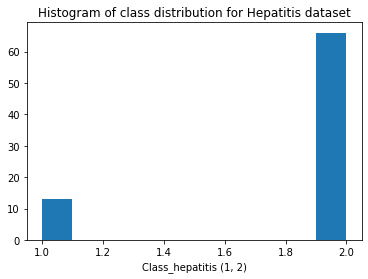

In [ ]:
# Plot the Class distribution for Hepatitis dataset
plt.hist(hepatitis["Class"])
plt.xlabel("Class_hepatitis (1, 2)")
plt.title("Histogram of class distribution for Hepatitis dataset")
plt.show()

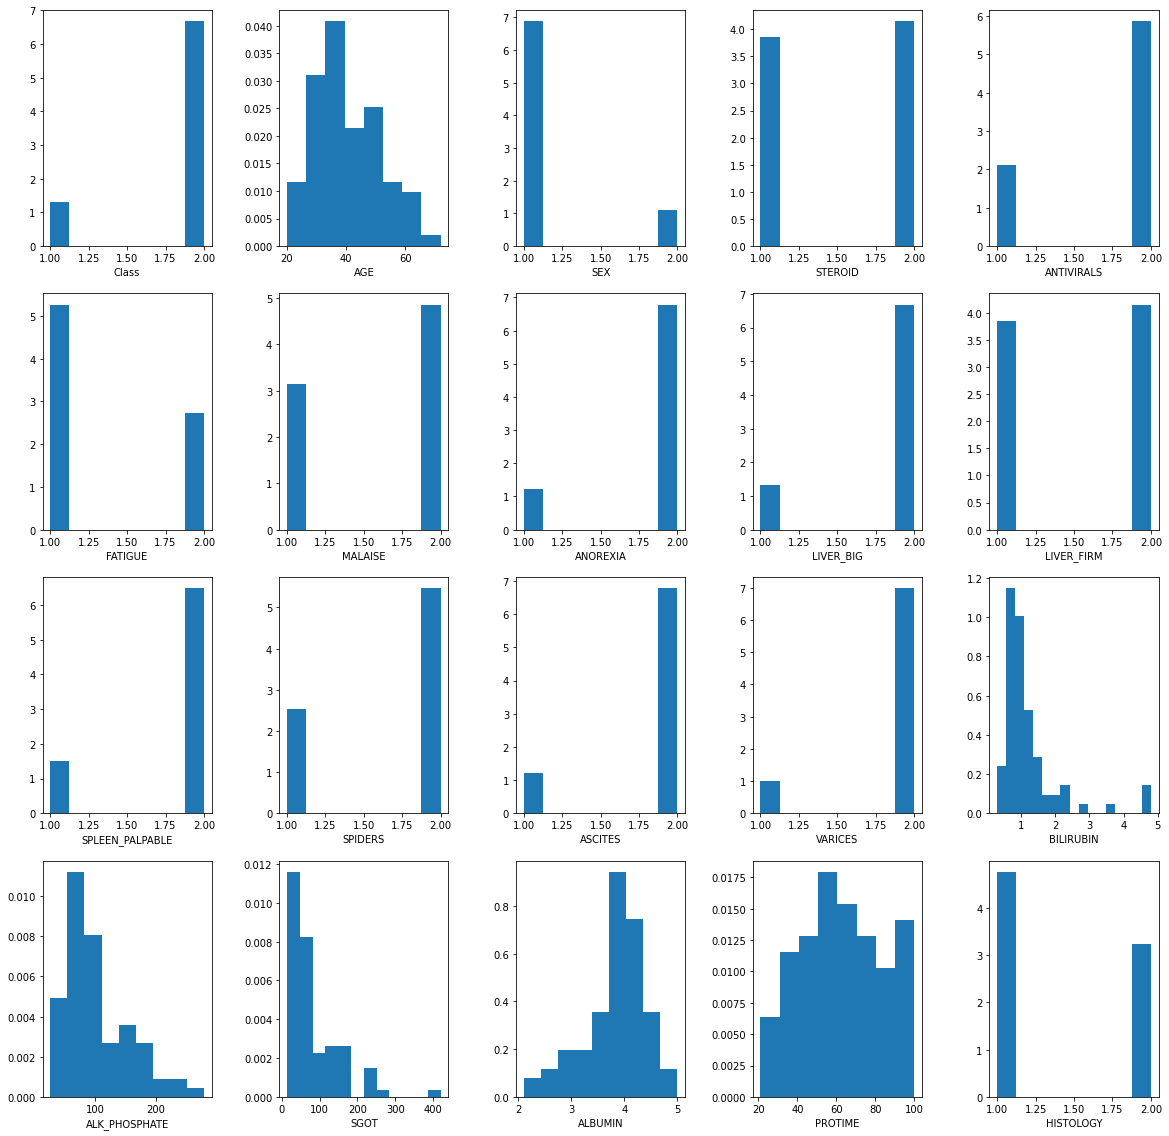

In [ ]:
# Plot distribution for each feature of Hepatitis dataset
plt.figure(figsize = (20, 20))
for i, col in enumerate(hepatitis.columns):
  plt.subplot(4, 5, i + 1)
  plt.hist(hepatitis[col], density=True, bins="auto")
  plt.xlabel(col)

plt.subplots_adjust(wspace=0.4)
plt.show()

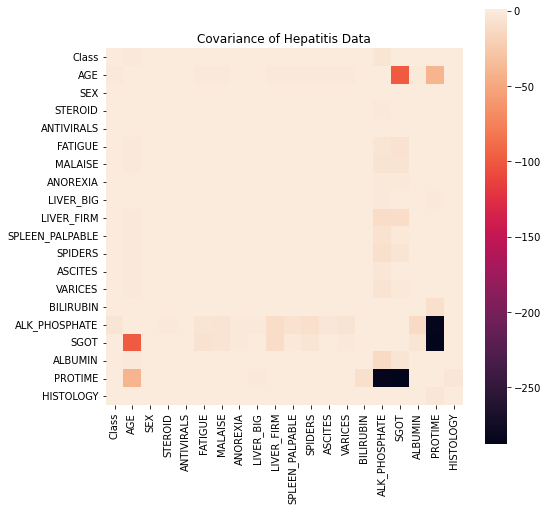

In [ ]:
# Compute the covariance for Hepatitis dataset
plt.figure(figsize = (8, 8))
hepatitis_covariance = hepatitis.cov()
sns.heatmap(hepatitis_covariance, vmax=.8, square=True)
plt.title("Covariance of Hepatitis Data")
plt.show()

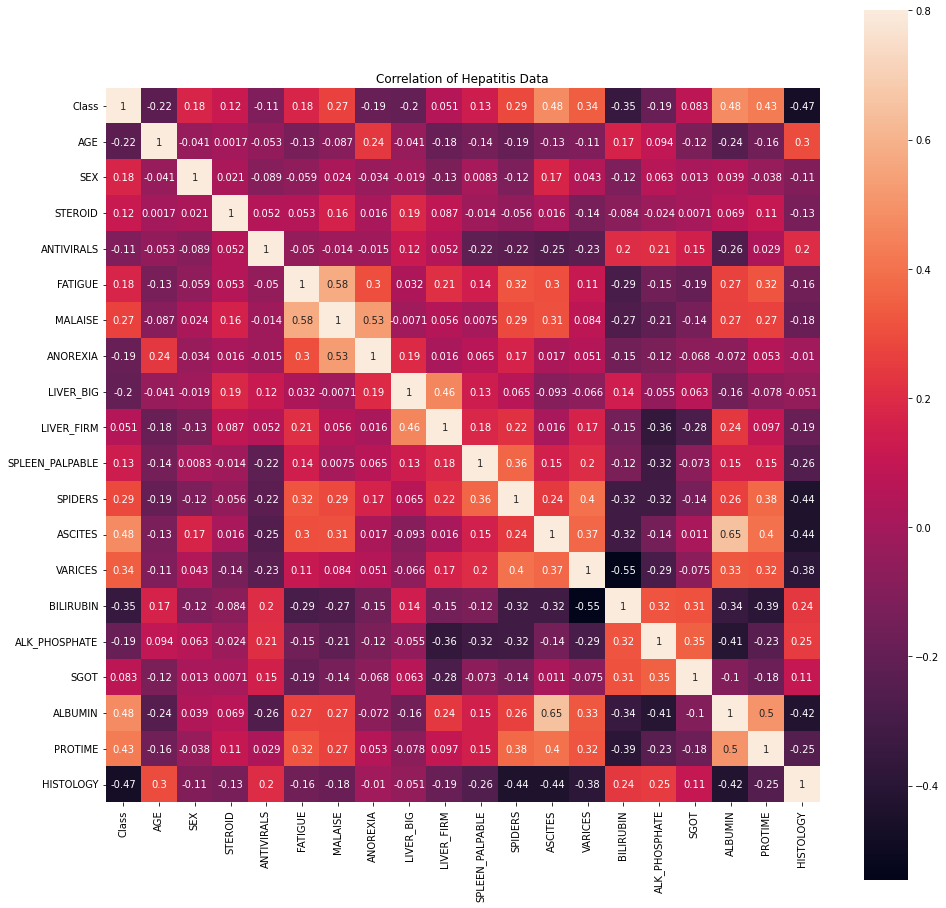

In [ ]:
# Compute correlation for Hepatitis dataset
plt.figure(figsize = (16, 16))
hepatitis_corr = hepatitis.corr()
sns.heatmap(hepatitis_corr, vmax=.8, square=True, annot = True)
plt.title("Correlation of Hepatitis Data")
plt.show()

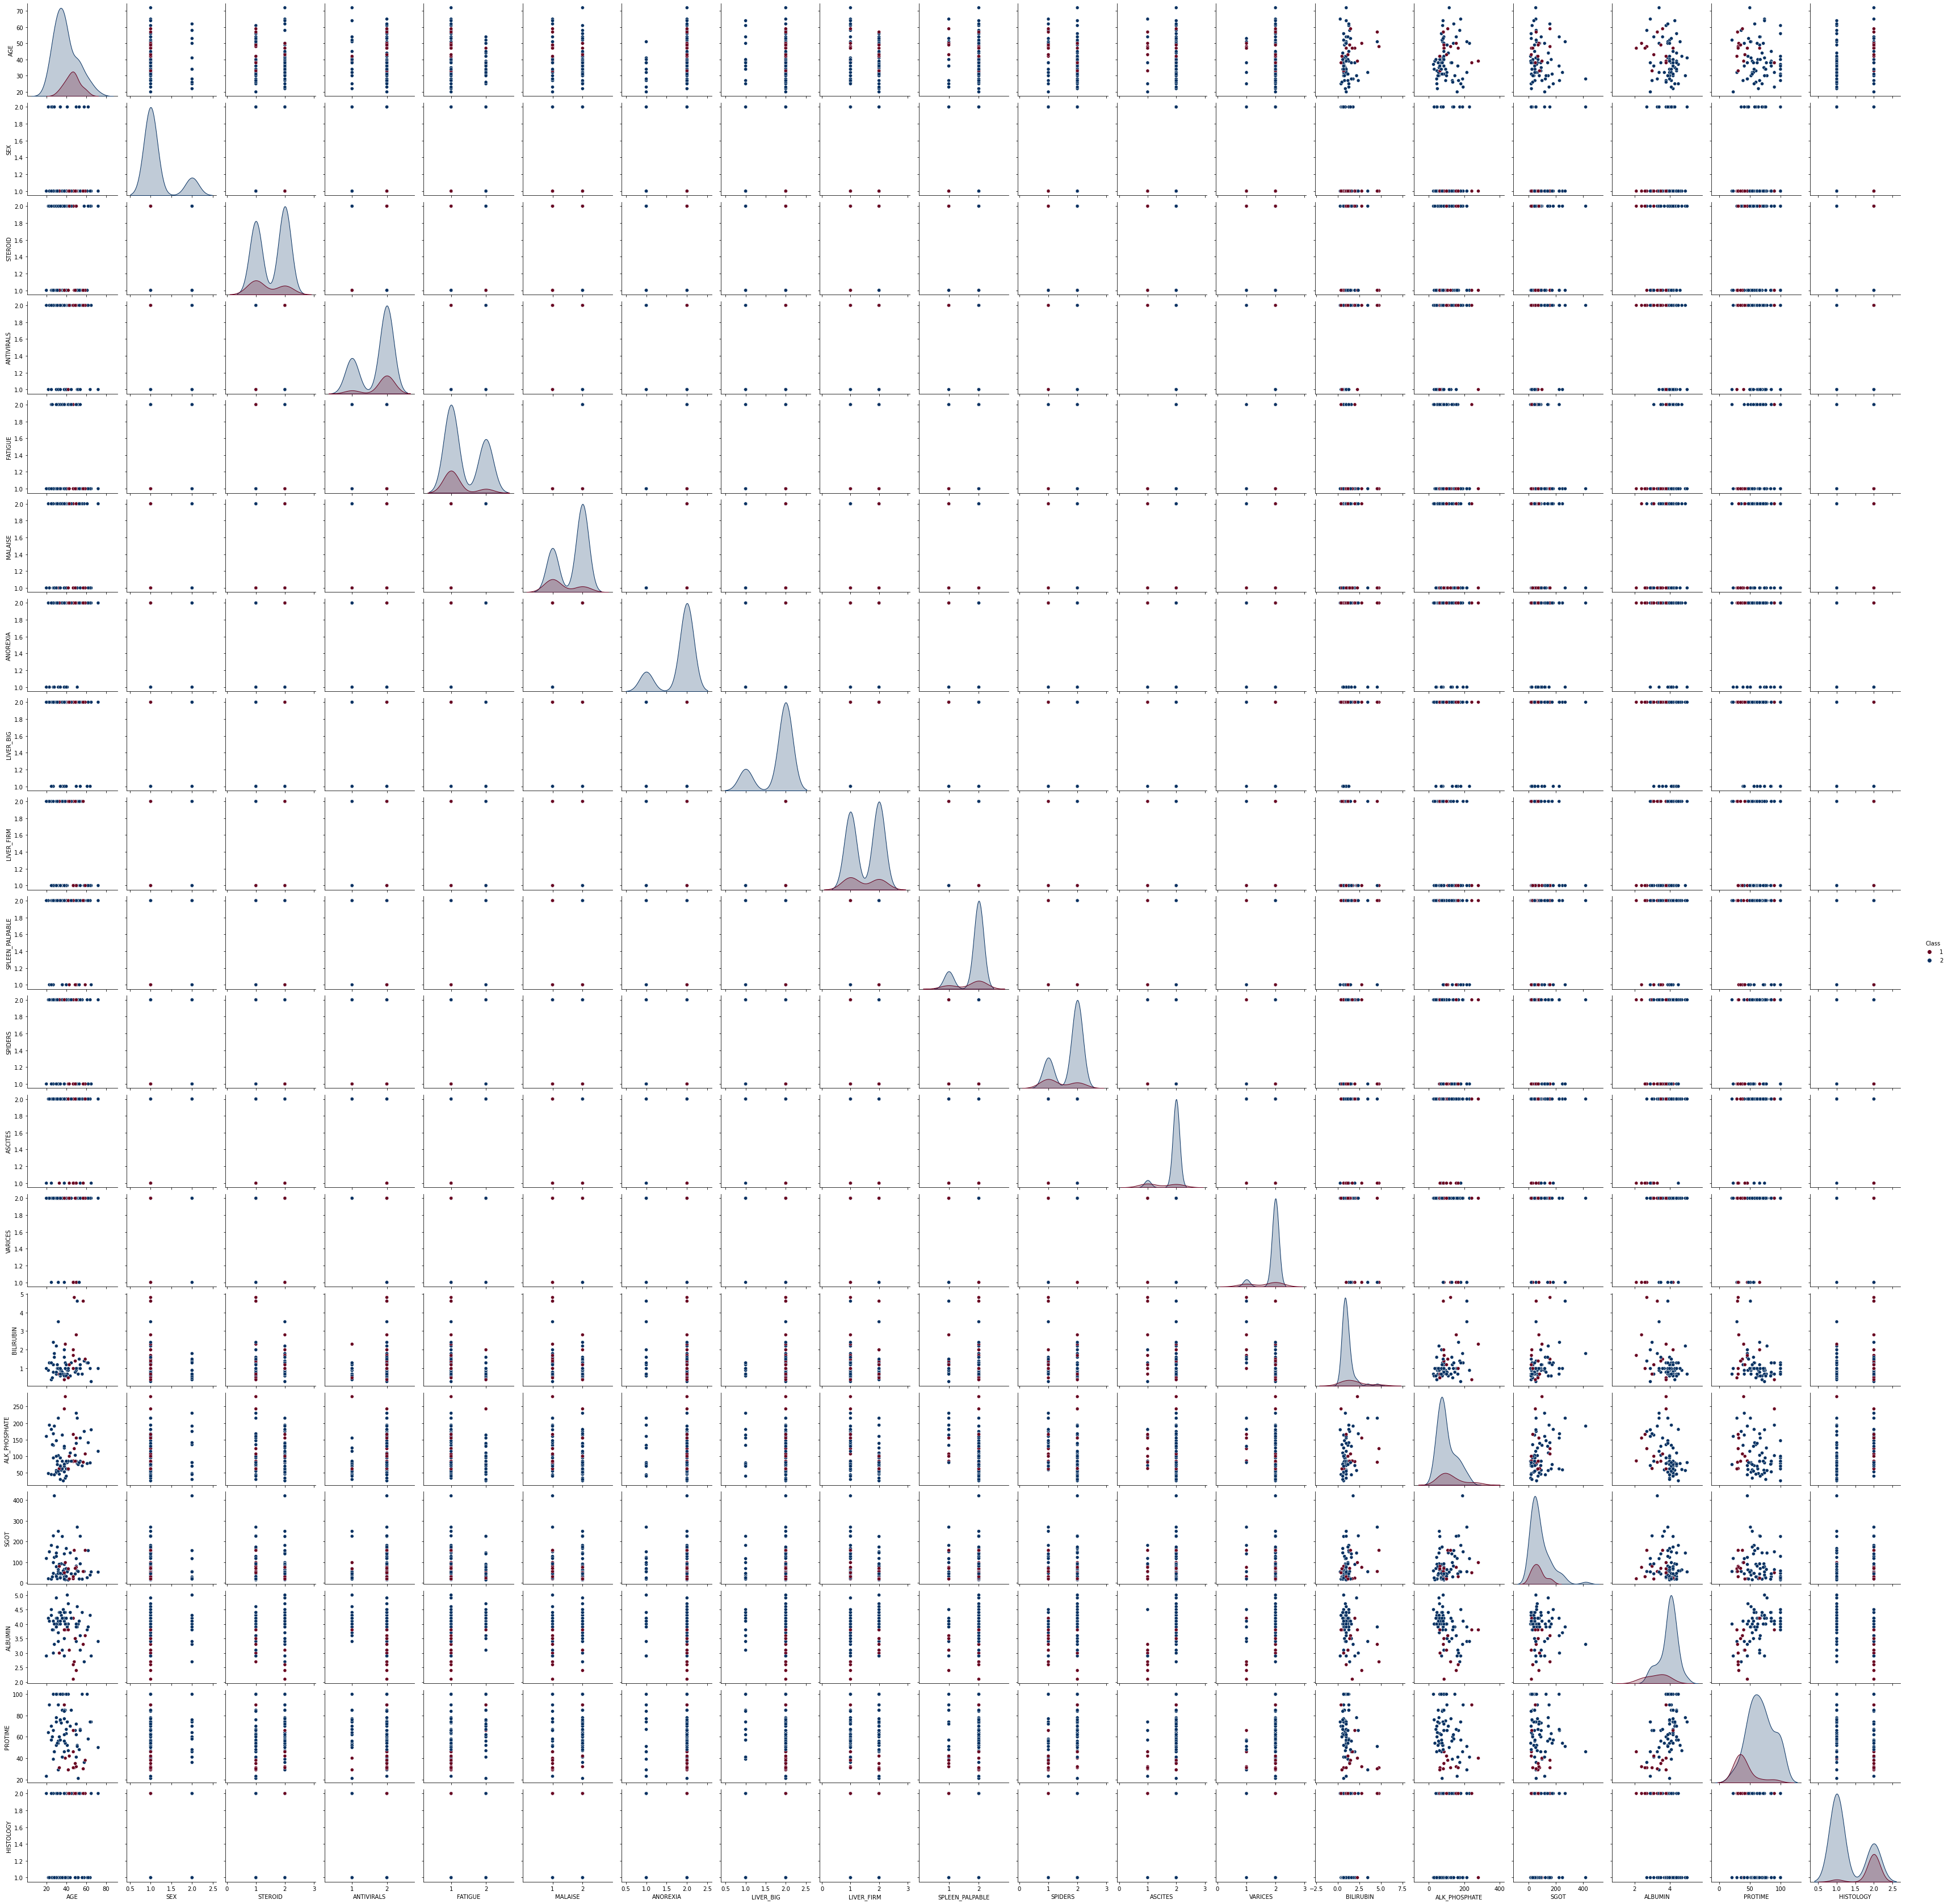

In [ ]:
cols = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 
        'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']
sns.pairplot(data = hepatitis[cols], hue='Class', palette="RdBu")
plt.show()

### **Messidor** Data Visualization

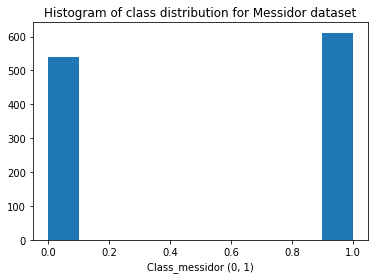

In [ ]:
# Plot the Class distribution for Messidor dataset
plt.hist(messidor["Class"])
plt.xlabel("Class_messidor (0, 1)")
plt.title("Histogram of class distribution for Messidor dataset")
plt.show()

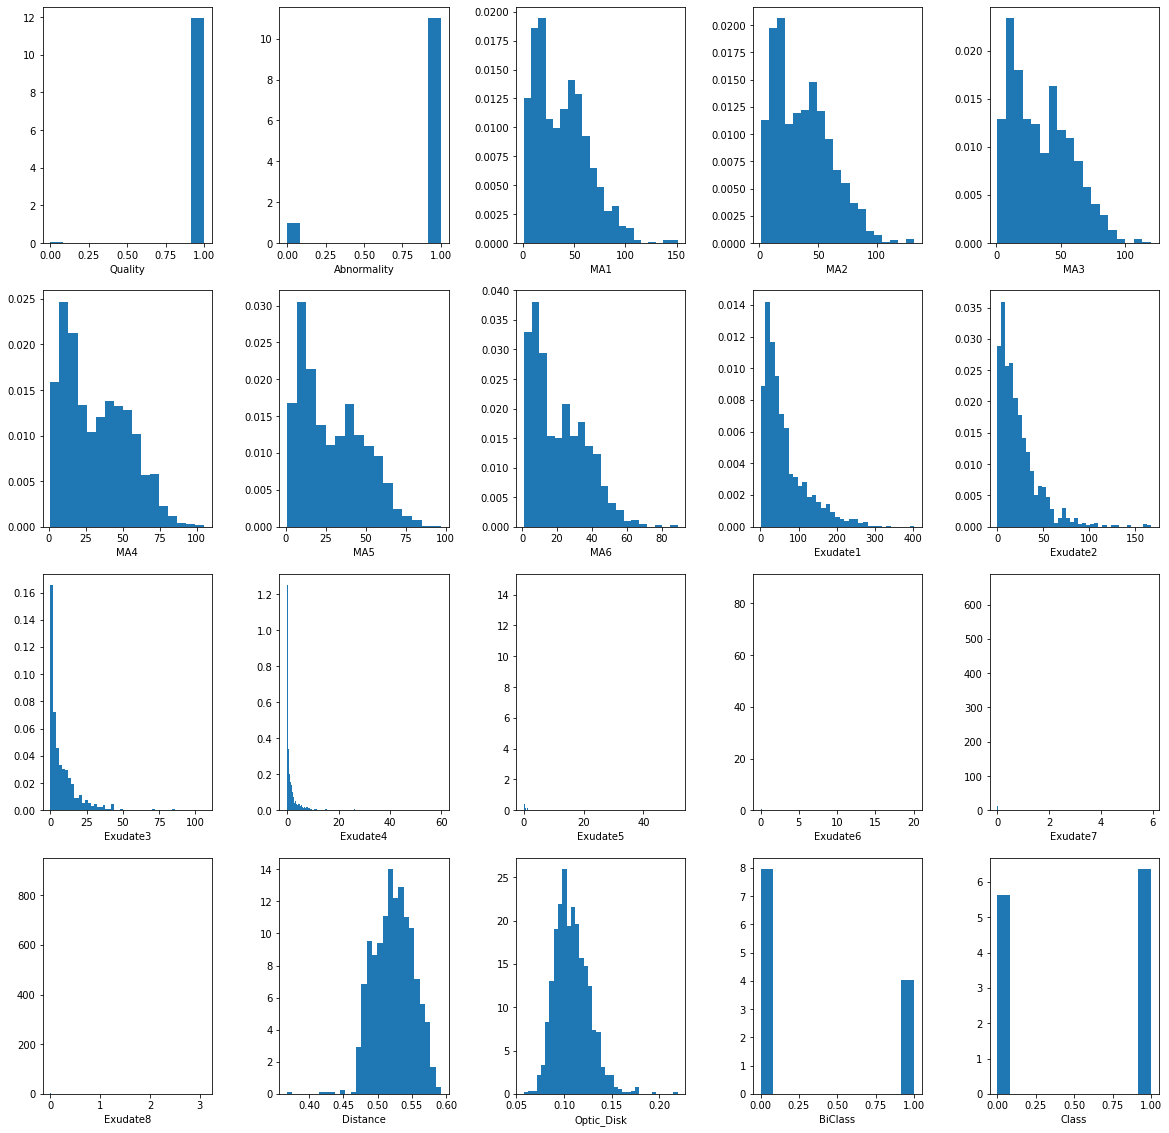

In [ ]:
# Plot distribution for each feature of Messidor dataset
plt.figure(figsize = (20, 20))
for i, col in enumerate(messidor.columns):
  plt.subplot(4, 5, i + 1)
  plt.hist(messidor[col], density=True, bins="auto")
  plt.xlabel(col)

plt.subplots_adjust(wspace=0.4)
plt.show()

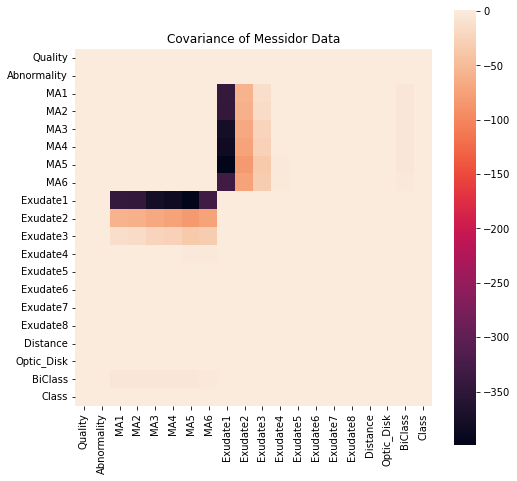

In [ ]:
# Compute the covariance for Messidor dataset
plt.figure(figsize = (8, 8))
messidor_covariance = messidor.cov()
sns.heatmap(messidor_covariance, vmax=.8, square=True)
plt.title("Covariance of Messidor Data")
plt.show()

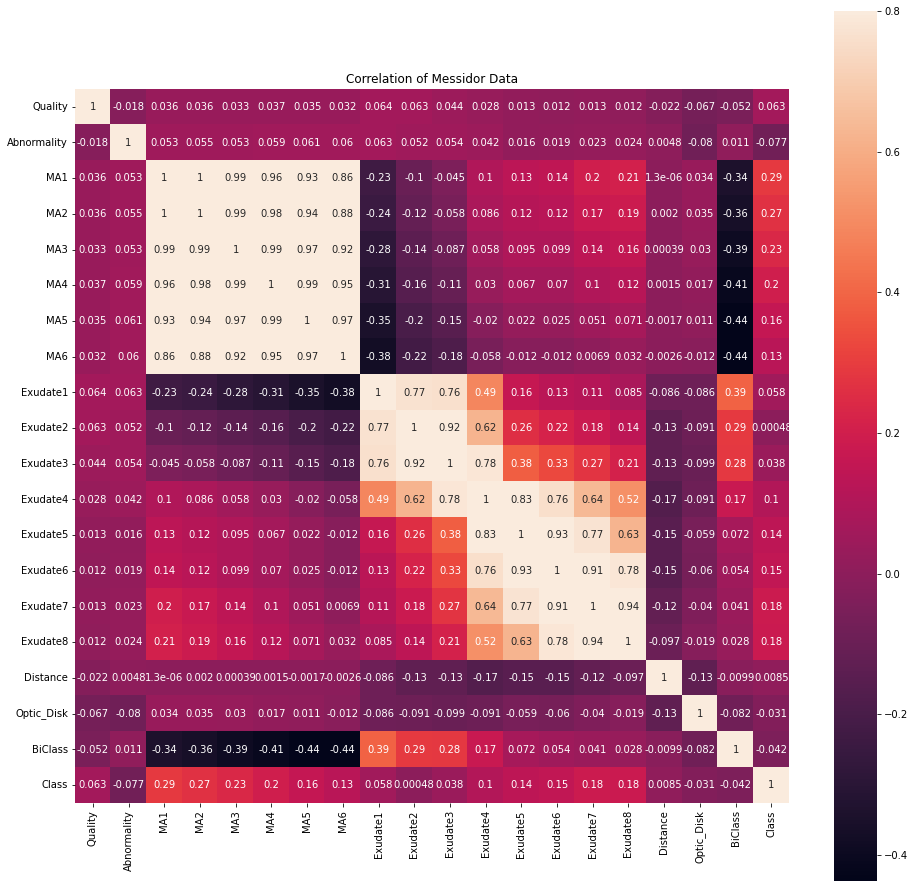

In [ ]:
# Compute correlation for Messidor dataset
plt.figure(figsize = (16, 16))
messidor_corr = messidor.corr()
sns.heatmap(messidor_corr, vmax=.8, square=True, annot = True)
plt.title("Correlation of Messidor Data")
plt.show()

# **Implementation of KNN Algorithms**

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:

  def __init__(self, dist_fn = euclidean):
    self.dist_fn = dist_fn
    self.K = 1
    return

  def fit(self, x_train, y_train, K_value):
    self.K = K_value
    self.x = x_train
    self.y = y_train
    self.y_vals = list(np.sort(np.unique(y_train.values)))
    return self

  def switch_dist_fn(self):
    if (self.dist_fn == euclidean):
      self.dist_fn = manhattan
      print("Distance function set to manhattan")
    else:
      self.dist_fn = euclidean
      print("Distance function set to euclidean")

  def predict(self, x_test):
    row_count = x_test.shape[0]
    x_train_numpy = self.x.values
    x_test_numpy = x_test.values
    distances = self.dist_fn(x_train_numpy[None,:,:], x_test_numpy[:,None,:])
    neighbors = np.zeros((row_count, self.K), dtype=int)
    y_prob = np.zeros((row_count, 2))

    for i in range(row_count):
      neighbors[i,:] = np.argsort(distances[i])[:self.K]
      for j in range(self.K):
        y_index = self.y_vals.index(self.y[neighbors[i,j]])
        y_prob[i,y_index] += 1
    y_prob /= self.K
    # Indexes of most possible label from our prediction
    y_pred_index = np.argmax(y_prob, axis=1)
    # Retrieve the labels using the indexes
    y_pred = np.zeros(row_count)
    for i in range(row_count):
      y_pred[i] = self.y_vals[y_pred_index[i]]
    return y_prob, y_pred, neighbors

## Weighted KNN

In [ ]:
class Weighted_KNN:

  def __init__(self, dist_fn = euclidean):
    self.dist_fn = dist_fn
    self.K = 1
    return

  def fit(self, x_train, y_train, K_value):
    self.K = K_value
    self.x = x_train
    self.y = y_train
    self.y_vals = list(np.sort(np.unique(y_train.values)))
    return self

  def switch_dist_fn(self):
    if (self.dist_fn == euclidean):
      self.dist_fn = manhattan
      print("Distance function set to manhattan")
    else:
      self.dist_fn = euclidean
      print("Distance function set to euclidean")

  def predict(self, x_test):
    row_count = x_test.shape[0]
    x_train_numpy = self.x.values
    x_test_numpy = x_test.values
    distances = self.dist_fn(x_train_numpy[None,:,:], x_test_numpy[:,None,:])
    neighbors = np.zeros((row_count, self.K), dtype=int)
    y_prob = np.zeros((row_count, 2))
    W_k = np.zeros((row_count, 1))

    for i in range(row_count):
      neighbors[i,:] = np.argsort(distances[i])[:self.K]
      W_k[i,:] = np.sum(np.reciprocal(np.sort(distances[i])[:self.K]+0.1)) # We add 0.1 here is to avoid infinity large number and zero division
      
      for j in range(self.K):
        y_index = self.y_vals.index(self.y[neighbors[i,j]])
        y_prob[i,y_index] += 1/(distances[i][neighbors[i,j]] + 0.1) # We add 0.1 here is to avoid infinity large number and zero division

    y_prob /= W_k 
    # Indexes of most possible label from our prediction
    y_pred_index = np.argmax(y_prob, axis=1)
    # Retrieve the labels using the indexes
    y_pred = np.zeros(row_count)
    for i in range(row_count):
      y_pred[i] = self.y_vals[y_pred_index[i]]
    return y_prob, y_pred, neighbors

# **Implementation of DT Algorithms**

In [ ]:
def flexible_class_prob(labels, y_vals):
  size = labels.shape[0]
  c_prob = np.zeros(len(y_vals))
  for i in range(size):
    for j in range(len(y_vals)):
      if labels.iloc[i] == y_vals[j]:
        c_prob[j] += 1
        continue
  c_prob = c_prob / size
  return c_prob

In [ ]:
class Node:
  def __init__(self, data_indices, parent):
    self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
    self.left = None                                    #stores the left child of the node 
    self.right = None                                   #stores the right child of the node
    self.split_feature = None                           #the feature for split at this node
    self.split_value = None                             #the value of the feature for split at this node
    if parent:
      self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
      self.num_classes = parent.num_classes           #copies the num classes from the parent 
      self.data = parent.data                         #copies the data from the parent, note: this is dataframe type
      self.labels = parent.labels                     #copies the labels from the parent, note: this is series type
      self.y_vals = parent.y_vals
      self.class_prob = flexible_class_prob(self.labels[data_indices], self.y_vals)  #stores the class probability for the node

In [ ]:
def greedy_test(node, cost_fn):
  #initialize the best parameter values
  best_cost = np.inf
  best_feature, best_value = None, None
  num_instances, num_features = node.data.shape
  #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
  data_sorted = np.sort(node.data.loc[node.data_indices],axis=0)
  test_candidates = pd.DataFrame(((data_sorted[1:] + data_sorted[:-1]) / 2.), columns=node.data.columns)
  # Iterate over column labels (features)
  for col in node.data:
    #stores the data corresponding to each feature
    data_f = node.data.loc[node.data_indices][col]
    for test in test_candidates[col]:
      #Split the indices using the test value of f-th feature
      left_indices = node.data_indices[data_f <= test]
      right_indices = node.data_indices[data_f > test]
      #we can't have a split where a child has zero element
      #if this is true over all the test features and their test values  then the function returns the best cost as infinity
      if len(left_indices) == 0 or len(right_indices) == 0:                
        continue
      #compute the left and right cost based on the current split                                                         
      left_cost = cost_fn(node.labels[left_indices], node.y_vals)
      right_cost = cost_fn(node.labels[right_indices], node.y_vals)
      num_left, num_right = left_indices.shape[0], right_indices.shape[0]
      #get the combined cost using the weighted sum of left and right cost
      cost = (num_left * left_cost + num_right * right_cost)/num_instances
      #update only when a lower cost is encountered
      if cost < best_cost:
        best_cost = cost
        best_feature = col
        best_value = test
  return best_cost, best_feature, best_value

In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels, y_vals):
  class_probs = flexible_class_prob(labels, y_vals)
  #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
  return 1 - np.max(class_probs)

def cost_entropy(labels, y_vals):
  class_probs = flexible_class_prob(labels, y_vals)
  class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
  return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels, y_vals):
  class_probs = flexible_class_prob(labels, y_vals)
  return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [ ]:
class DecisionTree:
  def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
    self.max_depth = max_depth      #maximum dept for termination 
    self.root = None                #stores the root of the decision tree 
    self.cost_fn = cost_fn          #stores the cost function of the decision tree 
    self.num_classes = num_classes  #stores the total number of classes
    self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
  def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
      self.num_classes = (labels.max() - labels.min()) + 1
    self.y_vals = list(np.sort(np.unique(labels.values)))
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    self.root.y_vals = self.y_vals
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

  def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances or self.cost_fn(self.labels[node.data_indices], self.y_vals) <= 0:
      return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
      return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}, depth {node.depth}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data.loc[node.data_indices][split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right
    
  def predict(self, x):
    class_probs = np.zeros((x.shape[0], self.num_classes))
    for n, x_row in x.iterrows():
      node = self.root
      #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
      while node.left:
        if x_row[node.split_feature] <= node.split_value:
          node = node.left
        else:
          node = node.right
      #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
      class_probs[n,:] = node.class_prob
    # Indexes of most possible label from our prediction
    y_pred_index = np.argmax(class_probs, axis=1)
    # Retrieve label values using indexes
    y_pred = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
      y_pred[i] = self.y_vals[y_pred_index[i]]
    return class_probs, y_pred

  def set_max_depth(self, depth):
    self.max_depth = depth
    return self
    
  def set_cost_fn(self, new_cost_fn):
    self.cost_fn = new_cost_fn
    return self
    
  def set_min_leaf_instance(self, new_instance):
    self.min_leaf_instance = new_instance
    return self

## A modified DT Class for huge datasets

In [ ]:
def greedy_test_huge(node, cost_fn, th_count):
  #initialize the best parameter values
  best_cost = np.inf
  best_feature, best_value = None, None
  num_instances, num_features = node.data.shape
  #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
  data_sorted = np.sort(node.data.loc[node.data_indices],axis=0)
  # Get the largest and smallest values from sorted data
  maxes = np.amax(data_sorted, axis=0)
  mins = np.amin(data_sorted, axis=0)
  tcs_numpy = np.zeros((th_count, maxes.shape[0]))
  # Find th_count values separated evenly between max and min as test candidates
  for i in range(maxes.shape[0]):
    tcs_numpy[:,i] = np.linspace(maxes[i], mins[i], num=th_count, endpoint=False)
  test_candidates = pd.DataFrame(tcs_numpy, columns=node.data.columns)
  # Iterate over column labels (features)
  for col in node.data:
    #stores the data corresponding to each feature
    data_f = node.data.loc[node.data_indices][col]
    for test in test_candidates[col]:
      #Split the indices using the test value of f-th feature
      left_indices = node.data_indices[data_f <= test]
      right_indices = node.data_indices[data_f > test]
      #we can't have a split where a child has zero element
      #if this is true over all the test features and their test values  then the function returns the best cost as infinity
      if len(left_indices) == 0 or len(right_indices) == 0:                
        continue
      #compute the left and right cost based on the current split                                                         
      left_cost = cost_fn(node.labels[left_indices], node.y_vals)
      right_cost = cost_fn(node.labels[right_indices], node.y_vals)
      num_left, num_right = left_indices.shape[0], right_indices.shape[0]
      #get the combined cost using the weighted sum of left and right cost
      cost = (num_left * left_cost + num_right * right_cost)/num_instances
      #update only when a lower cost is encountered
      if cost < best_cost:
        best_cost = cost
        best_feature = col
        best_value = test
  return best_cost, best_feature, best_value

In [ ]:
class DecisionTreeHuge:
  def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
    self.max_depth = max_depth      #maximum dept for termination 
    self.root = None                #stores the root of the decision tree 
    self.cost_fn = cost_fn          #stores the cost function of the decision tree 
    self.num_classes = num_classes  #stores the total number of classes
    self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
    self.th_count = 20        # Stores the number of thresholds we want in each greedy test
        
  def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
      self.num_classes = (labels.max() - labels.min()) + 1
    self.y_vals = list(np.sort(np.unique(labels.values)))
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    self.root.y_vals = self.y_vals
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

  def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances or self.cost_fn(self.labels[node.data_indices], self.y_vals) <= 0:
      return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test_huge(node, self.cost_fn, self.th_count)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
      return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}, depth {node.depth}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data.loc[node.data_indices][split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right
    
  def predict(self, x):
    class_probs = np.zeros((x.shape[0], self.num_classes))
    for n, x_row in x.iterrows():
      node = self.root
      #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
      while node.left:
        if x_row[node.split_feature] <= node.split_value:
          node = node.left
        else:
          node = node.right
      #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
      class_probs[n,:] = node.class_prob
    # Indexes of most possible label from our prediction
    y_pred_index = np.argmax(class_probs, axis=1)
    # Retrieve label values using indexes
    y_pred = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
      y_pred[i] = self.y_vals[y_pred_index[i]]
    return class_probs, y_pred

  def set_max_depth(self, depth):
    self.max_depth = depth
    return self
    
  def set_cost_fn(self, new_cost_fn):
    self.cost_fn = new_cost_fn
    return self
    
  def set_min_leaf_instance(self, new_instance):
    self.min_leaf_instance = new_instance
    return self

# **Evaluate Accuracy**

In [ ]:
def evaluate_acc(y_pred, y_label):
  return np.sum(y_pred == y_label)/y_label.shape[0]

# **Testing** **Experiments**

In [ ]:
# Shuffling and separating data for hepatitis dataset
hepatitis_x = hepatitis.drop('Class', axis=1)
hepatitis_y = hepatitis['Class']

n, f = hepatitis.shape
indexes = np.random.permutation(n)
validation_frac = int(n*0.66)
test_frac = int(validation_frac*0.5)

h_x_train, h_y_train = hepatitis_x.loc[indexes[:test_frac]].reset_index(drop=True), hepatitis_y.loc[indexes[:test_frac]].reset_index(drop=True)
h_x_val, h_y_val = hepatitis_x.loc[indexes[test_frac:validation_frac]].reset_index(drop=True), hepatitis_y.loc[indexes[test_frac:validation_frac]].reset_index(drop=True)
h_x_test, h_y_test = hepatitis_x.loc[indexes[validation_frac:]].reset_index(drop=True), hepatitis_y.loc[indexes[validation_frac:]].reset_index(drop=True)

# Shuffling and separating data for messidor dataset
messidor_x = messidor.drop('Class', axis=1)
messidor_y = messidor['Class']

n1, f1 = messidor.shape
indexes1 = np.random.permutation(n1)
validation_frac1 = int(n1*0.66)
test_frac1 = int(validation_frac1*0.5)

m_x_train, m_y_train = messidor_x.loc[indexes1[:test_frac1]].reset_index(drop=True), messidor_y.loc[indexes1[:test_frac1]].reset_index(drop=True)
m_x_val, m_y_val = messidor_x.loc[indexes1[test_frac1:validation_frac1]].reset_index(drop=True), messidor_y.loc[indexes1[test_frac1:validation_frac1]].reset_index(drop=True)
m_x_test, m_y_test = messidor_x.loc[indexes1[validation_frac1:]].reset_index(drop=True), messidor_y.loc[indexes1[validation_frac1:]].reset_index(drop=True)


### KNN

Test for best k without any standardization or feature selection

In [ ]:
model = KNN()
# Test for best k without any standardization or feature selection
print("Hepatitis")
for k in range(1,11):
  model.fit(h_x_train, h_y_train, k)
  h_y_prob, h_y_pred, h_y_neighbors = model.predict(h_x_val)
  print("K = "+str(k) + " " + "Accuracy : " + str(evaluate_acc(h_y_pred, h_y_val)))

print("")

print("Messidor")
for k in range(1,11):
  model.fit(m_x_train, m_y_train, k)
  m_y_prob, m_y_pred, m_y_neighbors = model.predict(m_x_val)
  print("K = "+str(k) + " " + "Accuracy : " + str(evaluate_acc(m_y_pred, m_y_val)))

Hepatitis
K = 1 Accuracy : 0.7307692307692307
K = 2 Accuracy : 0.7692307692307693
K = 3 Accuracy : 0.8461538461538461
K = 4 Accuracy : 0.8076923076923077
K = 5 Accuracy : 0.7692307692307693
K = 6 Accuracy : 0.7692307692307693
K = 7 Accuracy : 0.8461538461538461
K = 8 Accuracy : 0.8076923076923077
K = 9 Accuracy : 0.8461538461538461
K = 10 Accuracy : 0.8461538461538461

Messidor
K = 1 Accuracy : 0.6210526315789474
K = 2 Accuracy : 0.6131578947368421
K = 3 Accuracy : 0.6578947368421053
K = 4 Accuracy : 0.6157894736842106
K = 5 Accuracy : 0.6342105263157894
K = 6 Accuracy : 0.6342105263157894
K = 7 Accuracy : 0.6473684210526316
K = 8 Accuracy : 0.6052631578947368
K = 9 Accuracy : 0.6368421052631579
K = 10 Accuracy : 0.6131578947368421


Standardize all data sets

In [ ]:
# Standardize all data sets
stdzed_hxtr = (h_x_train - h_x_train.mean()) / h_x_train.std()
stdzed_hxv = (h_x_val - h_x_val.mean()) / h_x_val.std()
stdzed_hxte = (h_x_test - h_x_test.mean()) / h_x_test.std()

stdzed_mxtr = (m_x_train - m_x_train.mean()) / m_x_train.std()
stdzed_mxv = (m_x_val - m_x_val.mean()) / m_x_val.std()
stdzed_mxte = (m_x_test - m_x_test.mean()) / m_x_test.std()

# Test for best k with standardization only
print("Hepatitis")
for k in range(1,11):
  model.fit(stdzed_hxtr, h_y_train, k)
  h_y_prob, h_y_pred, h_y_neighbors = model.predict(stdzed_hxv)
  print("K = "+str(k) + " " + "Accuracy : " + str(evaluate_acc(h_y_pred, h_y_val)))

print("")

print("Messidor")
for k in range(1,11):
  model.fit(stdzed_mxtr, m_y_train, k)
  m_y_prob, m_y_pred, m_y_neighbors = model.predict(stdzed_mxv)
  print("K = "+str(k) + " " + "Accuracy : " + str(evaluate_acc(m_y_pred, m_y_val)))

Hepatitis
K = 1 Accuracy : 0.8846153846153846
K = 2 Accuracy : 0.8846153846153846
K = 3 Accuracy : 0.9615384615384616
K = 4 Accuracy : 0.8846153846153846
K = 5 Accuracy : 0.9230769230769231
K = 6 Accuracy : 0.9230769230769231
K = 7 Accuracy : 0.9230769230769231
K = 8 Accuracy : 0.9230769230769231
K = 9 Accuracy : 0.8461538461538461
K = 10 Accuracy : 0.8461538461538461

Messidor
K = 1 Accuracy : 0.5394736842105263
K = 2 Accuracy : 0.5394736842105263
K = 3 Accuracy : 0.5394736842105263
K = 4 Accuracy : 0.5394736842105263
K = 5 Accuracy : 0.5394736842105263
K = 6 Accuracy : 0.5394736842105263
K = 7 Accuracy : 0.5394736842105263
K = 8 Accuracy : 0.4605263157894737
K = 9 Accuracy : 0.5394736842105263
K = 10 Accuracy : 0.4605263157894737


Choosing the most relevant features by correlation and test with KNN

In [ ]:
# Choosing the most relevant features by correlation and test with KNN
# Hepatitis
hx_high_corr_train = h_x_train.drop(["LIVER_FIRM", "SGOT"], axis=1)
hx_high_corr_val = h_x_val.drop(["LIVER_FIRM", "SGOT"], axis=1)
hx_high_corr_test = h_x_test.drop(["LIVER_FIRM", "SGOT"], axis=1)
# Test for best k with feature selection
print("Hepatitis")
for k in range(1,11):
  model.fit(hx_high_corr_train, h_y_train, k)
  h_y_prob, h_y_pred, h_y_neighbors = model.predict(hx_high_corr_val)
  print("K = "+str(k) + " " + "Accuracy : " + str(evaluate_acc(h_y_pred, h_y_val)))

print("")

# Standardize them
print("Hepatitis standardized")
stdzed_hxhctr = (hx_high_corr_train - hx_high_corr_train.mean()) / hx_high_corr_train.std()
stdzed_hxhcv = (hx_high_corr_val - hx_high_corr_val.mean()) / hx_high_corr_val.std()
stdzed_hxhcte = (hx_high_corr_test - hx_high_corr_test.mean()) / hx_high_corr_test.std()
# Test for best k with both standardization and feature selection
for k in range(1,11):
  model.fit(stdzed_hxhctr, h_y_train, k)
  h_y_prob, h_y_pred, h_y_neighbors = model.predict(stdzed_hxhcv)
  print("K = "+str(k) + " " + "Accuracy : " + str(evaluate_acc(h_y_pred, h_y_val)))

print("")

# Messidor
mx_high_corr_train = m_x_train.drop(["Exudate1", "Exudate2", "Exudate3", "Distance", "Optic_Disk", "BiClass"], axis=1)
mx_high_corr_val = m_x_val.drop(["Exudate1", "Exudate2", "Exudate3", "Distance", "Optic_Disk", "BiClass"], axis=1)
mx_high_corr_test = m_x_test.drop(["Exudate1", "Exudate2", "Exudate3", "Distance", "Optic_Disk", "BiClass"], axis=1)
# Test for best k with feature selection
print("Messidor")
for k in range(1,11):
  model.fit(mx_high_corr_train, m_y_train, k)
  m_y_prob, m_y_pred, m_y_neighbors = model.predict(mx_high_corr_val)
  print("K = "+str(k) + " " + "Accuracy : " + str(evaluate_acc(m_y_pred, m_y_val)))

print("")
# Standardize them
stdzed_mxhctr = (mx_high_corr_train - mx_high_corr_train.mean()) / mx_high_corr_train.std()
stdzed_mxhcv = (mx_high_corr_val - mx_high_corr_val.mean()) / mx_high_corr_val.std()
stdzed_mxhcte = (mx_high_corr_test - mx_high_corr_test.mean()) / mx_high_corr_test.std()
# Test for best k with both standardization and feature selection
print("Messidor standardized")
for k in range(1,11):
  model.fit(stdzed_mxhctr, m_y_train, k)
  m_y_prob, m_y_pred, m_y_neighbors = model.predict(stdzed_mxhcv)
  print("K = "+str(k) + " " + "Accuracy : " + str(evaluate_acc(m_y_pred, m_y_val)))

Hepatitis
K = 1 Accuracy : 0.7307692307692307
K = 2 Accuracy : 0.7692307692307693
K = 3 Accuracy : 0.8076923076923077
K = 4 Accuracy : 0.8846153846153846
K = 5 Accuracy : 0.8846153846153846
K = 6 Accuracy : 0.8076923076923077
K = 7 Accuracy : 0.8461538461538461
K = 8 Accuracy : 0.8461538461538461
K = 9 Accuracy : 0.8461538461538461
K = 10 Accuracy : 0.8461538461538461

Hepatitis standardized
K = 1 Accuracy : 0.8846153846153846
K = 2 Accuracy : 0.8076923076923077
K = 3 Accuracy : 0.8846153846153846
K = 4 Accuracy : 0.8076923076923077
K = 5 Accuracy : 0.9230769230769231
K = 6 Accuracy : 0.8846153846153846
K = 7 Accuracy : 0.9615384615384616
K = 8 Accuracy : 0.9615384615384616
K = 9 Accuracy : 0.8846153846153846
K = 10 Accuracy : 0.9230769230769231

Messidor
K = 1 Accuracy : 0.6421052631578947
K = 2 Accuracy : 0.6157894736842106
K = 3 Accuracy : 0.6342105263157894
K = 4 Accuracy : 0.6289473684210526
K = 5 Accuracy : 0.6394736842105263
K = 6 Accuracy : 0.6578947368421053
K = 7 Accuracy : 0

Switch to Mahatten distance

In [ ]:
# Try using Manhattan distance
model.switch_dist_fn()
# Test for best k with both standardization and feature selection using Hepatitis

print("Hepatitis standardized with feature selection")
for k in range(1,11):
  model.fit(stdzed_hxhctr, h_y_train, k)
  h_y_prob, h_y_pred, h_y_neighbors = model.predict(stdzed_hxhcv)
  print("K = "+str(k) + " " + "Accuracy : " + str(evaluate_acc(h_y_pred, h_y_val)))

print("")
# Use unstandardized and feature selected Messidor instead
print("Messidor with feature selection")
for k in range(1,11):
  model.fit(mx_high_corr_train, m_y_train, k)
  m_y_prob, m_y_pred, m_y_neighbors = model.predict(mx_high_corr_val)
  print("K = "+str(k) + " " + "Accuracy : " + str(evaluate_acc(m_y_pred, m_y_val)))



Distance function set to manhattan
Hepatitis standardized with feature selection
K = 1 Accuracy : 0.8846153846153846
K = 2 Accuracy : 0.7692307692307693
K = 3 Accuracy : 0.9230769230769231
K = 4 Accuracy : 0.8076923076923077
K = 5 Accuracy : 0.9615384615384616
K = 6 Accuracy : 0.9230769230769231
K = 7 Accuracy : 1.0
K = 8 Accuracy : 1.0
K = 9 Accuracy : 0.8461538461538461
K = 10 Accuracy : 0.8461538461538461

Messidor with feature selection
K = 1 Accuracy : 0.6289473684210526
K = 2 Accuracy : 0.631578947368421
K = 3 Accuracy : 0.6210526315789474
K = 4 Accuracy : 0.6157894736842106
K = 5 Accuracy : 0.6447368421052632
K = 6 Accuracy : 0.6368421052631579
K = 7 Accuracy : 0.6657894736842105
K = 8 Accuracy : 0.6868421052631579
K = 9 Accuracy : 0.6789473684210526
K = 10 Accuracy : 0.65


Weighted KNN

In [ ]:
model2 = Weighted_KNN()
# Test for best k with both standardization and feature selection for Hepatitis
print("Hepatitis standardized with feature selection")
for k in range(1,11):
  model2.fit(stdzed_hxhctr, h_y_train, k)
  h_y_prob, h_y_pred, h_y_neighbors = model2.predict(stdzed_hxhcv)
  print("K = "+str(k) + " " + "Accuracy : " + str(evaluate_acc(h_y_pred, h_y_val)))

print("")
# Use unstandardized and feature selection for Messidor
print("Messidor with feature selection")
for k in range(1,11):
  model2.fit(mx_high_corr_train, m_y_train, k)
  m_y_prob, m_y_pred, m_y_neighbors = model2.predict(mx_high_corr_val)
  print("K = "+str(k) + " " + "Accuracy : " + str(evaluate_acc(m_y_pred, m_y_val)))

Hepatitis standardized with feature selection
K = 1 Accuracy : 0.8846153846153846
K = 2 Accuracy : 0.8846153846153846
K = 3 Accuracy : 0.8846153846153846
K = 4 Accuracy : 0.8076923076923077
K = 5 Accuracy : 0.9230769230769231
K = 6 Accuracy : 0.9615384615384616
K = 7 Accuracy : 0.9615384615384616
K = 8 Accuracy : 0.9615384615384616
K = 9 Accuracy : 0.8846153846153846
K = 10 Accuracy : 0.9230769230769231

Messidor with feature selection
K = 1 Accuracy : 0.6421052631578947
K = 2 Accuracy : 0.6421052631578947
K = 3 Accuracy : 0.6236842105263158
K = 4 Accuracy : 0.6394736842105263
K = 5 Accuracy : 0.6289473684210526
K = 6 Accuracy : 0.6368421052631579
K = 7 Accuracy : 0.6447368421052632
K = 8 Accuracy : 0.6473684210526316
K = 9 Accuracy : 0.6473684210526316
K = 10 Accuracy : 0.6473684210526316


In [ ]:
model2.switch_dist_fn()
# Test for best k with both standardization and feature selection for Hepatitis
print("Hepatitis standardized with feature selection")
for k in range(1,11):
  model2.fit(stdzed_hxhctr, h_y_train, k)
  h_y_prob, h_y_pred, h_y_neighbors = model2.predict(stdzed_hxhcv)
  print("K = "+str(k) + " " + "Accuracy : " + str(evaluate_acc(h_y_pred, h_y_val)))

print("")
# Use unstandardized and feature selection for Messidor
print("Messidor with feature selection")
for k in range(1,11):
  model2.fit(mx_high_corr_train, m_y_train, k)
  m_y_prob, m_y_pred, m_y_neighbors = model2.predict(mx_high_corr_val)
  print("K = "+str(k) + " " + "Accuracy : " + str(evaluate_acc(m_y_pred, m_y_val)))

Distance function set to manhattan
Hepatitis standardized with feature selection
K = 1 Accuracy : 0.8846153846153846
K = 2 Accuracy : 0.8846153846153846
K = 3 Accuracy : 0.9230769230769231
K = 4 Accuracy : 0.8846153846153846
K = 5 Accuracy : 0.9615384615384616
K = 6 Accuracy : 0.9615384615384616
K = 7 Accuracy : 1.0
K = 8 Accuracy : 1.0
K = 9 Accuracy : 0.9230769230769231
K = 10 Accuracy : 0.8461538461538461

Messidor with feature selection
K = 1 Accuracy : 0.6289473684210526
K = 2 Accuracy : 0.6289473684210526
K = 3 Accuracy : 0.6236842105263158
K = 4 Accuracy : 0.6263157894736842
K = 5 Accuracy : 0.6394736842105263
K = 6 Accuracy : 0.6473684210526316
K = 7 Accuracy : 0.65
K = 8 Accuracy : 0.6605263157894737
K = 9 Accuracy : 0.6605263157894737
K = 10 Accuracy : 0.6552631578947369


### Decision Tree

Test for best depth and best cost function without feature selection

In [ ]:
# Testing the best depth and best cost function with hepatitis dataset
print("Hepatitis")
print("cost_misclassification")
for i in range(1, 7):
  dtmodel = DecisionTree(2, i, cost_misclassification, 1)
  dtmodel.fit(h_x_train, h_y_train)
  cb, h_y_pred = dtmodel.predict(h_x_val)
  print("Depth: " + str(i) + "  Accuracy: " + str(evaluate_acc(h_y_pred, h_y_val)))

print("")
print("cost_entropy")
for i in range(1, 7):
  dtmodel = DecisionTree(2, i, cost_entropy, 1)
  dtmodel.fit(h_x_train, h_y_train)
  cb, h_y_pred = dtmodel.predict(h_x_val)
  print("Depth: " + str(i) + "  Accuracy: " + str(evaluate_acc(h_y_pred, h_y_val)))

print("")
print("cost_gini_index")
for i in range(1, 7):
  dtmodel = DecisionTree(2, i, cost_gini_index, 1)
  dtmodel.fit(h_x_train, h_y_train)
  cb, h_y_pred = dtmodel.predict(h_x_val)
  print("Depth: " + str(i) + "  Accuracy: " + str(evaluate_acc(h_y_pred, h_y_val)))

print("")
print("Messidor")
print("cost_misclassification")
# Testing the best depth and best cost function with mesiddor dataset
for i in range(1, 7):
  dtmodel = DecisionTreeHuge(2, i, cost_misclassification, 1)
  dtmodel.fit(m_x_train, m_y_train)
  cb, m_y_pred = dtmodel.predict(m_x_val)
  print("Depth: " + str(i) + "  Accuracy: " + str(evaluate_acc(m_y_pred, m_y_val)))

print("")
print("cost_entropy")
for i in range(1, 7):
  dtmodel = DecisionTreeHuge(2, i, cost_entropy, 1)
  dtmodel.fit(m_x_train, m_y_train)
  cb, m_y_pred = dtmodel.predict(m_x_val)
  print("Depth: " + str(i) + "  Accuracy: " + str(evaluate_acc(m_y_pred, m_y_val)))

print("")
print("cost_gini_index")
for i in range(1, 7):
  dtmodel = DecisionTreeHuge(2, i, cost_gini_index, 1)
  dtmodel.fit(m_x_train, m_y_train)
  cb, m_y_pred = dtmodel.predict(m_x_val)
  print("Depth: " + str(i) + "  Accuracy: " + str(evaluate_acc(m_y_pred, m_y_val)))


Hepatitis
cost_misclassification
Depth: 1  Accuracy: 0.8846153846153846
Depth: 2  Accuracy: 0.8461538461538461
Depth: 3  Accuracy: 0.8461538461538461
Depth: 4  Accuracy: 0.8076923076923077
Depth: 5  Accuracy: 0.8076923076923077
Depth: 6  Accuracy: 0.7307692307692307

cost_entropy
Depth: 1  Accuracy: 0.8076923076923077
Depth: 2  Accuracy: 0.7692307692307693
Depth: 3  Accuracy: 0.7307692307692307
Depth: 4  Accuracy: 0.7307692307692307
Depth: 5  Accuracy: 0.7307692307692307
Depth: 6  Accuracy: 0.7307692307692307

cost_gini_index
Depth: 1  Accuracy: 0.8076923076923077
Depth: 2  Accuracy: 0.7692307692307693
Depth: 3  Accuracy: 0.7307692307692307
Depth: 4  Accuracy: 0.7307692307692307
Depth: 5  Accuracy: 0.7307692307692307
Depth: 6  Accuracy: 0.7307692307692307

Messidor
cost_misclassification
Depth: 1  Accuracy: 0.6105263157894737
Depth: 2  Accuracy: 0.5710526315789474
Depth: 3  Accuracy: 0.6052631578947368
Depth: 4  Accuracy: 0.6157894736842106
Depth: 5  Accuracy: 0.5921052631578947
Depth:

Choosing the most relevant features by correlation and test with Decision Tree

In [ ]:
hx_high_corr_train_dt = h_x_train[['ALBUMIN', 'PROTIME', 'ASCITES']]
hx_high_corr_val_dt = h_x_val[['ALBUMIN', 'PROTIME', 'ASCITES']]
hx_high_corr_test_dt = h_x_test[['ALBUMIN', 'PROTIME', 'ASCITES']]

mx_high_corr_train_dt = m_x_train[['MA1', 'MA2', 'MA3', 'MA4']]
mx_high_corr_val_dt = m_x_val[['MA1', 'MA2', 'MA3', 'MA4']]
mx_high_corr_test_dt = m_x_test[['MA1', 'MA2', 'MA3', 'MA4']]

In [ ]:
# Testing the best depth and best cost function with hepatitis dataset
print("Hepatitis")
print("cost_misclassification")
for i in range(1, 7):
  dtmodel = DecisionTree(2, i, cost_misclassification, 1)
  dtmodel.fit(hx_high_corr_train_dt, h_y_train)
  cb, h_y_pred = dtmodel.predict(hx_high_corr_val_dt)
  print("Depth: " + str(i) + "  Accuracy: " + str(evaluate_acc(h_y_pred, h_y_val)))

print("")
print("cost_entropy")
for i in range(1, 7):
  dtmodel = DecisionTree(2, i, cost_entropy, 1)
  dtmodel.fit(hx_high_corr_train_dt, h_y_train)
  cb, h_y_pred = dtmodel.predict(hx_high_corr_val_dt)
  print("Depth: " + str(i) + "  Accuracy: " + str(evaluate_acc(h_y_pred, h_y_val)))

print("")
print("cost_gini_index")
for i in range(1, 7):
  dtmodel = DecisionTree(2, i, cost_gini_index, 1)
  dtmodel.fit(hx_high_corr_train_dt, h_y_train)
  cb, h_y_pred = dtmodel.predict(hx_high_corr_val_dt)
  print("Depth: " + str(i) + "  Accuracy: " + str(evaluate_acc(h_y_pred, h_y_val)))

print("")
print("Messidor")
print("cost_misclassification")
# Testing the best depth and best cost function with mesiddor dataset
for i in range(1, 7):
  dtmodel = DecisionTreeHuge(2, i, cost_misclassification, 1)
  dtmodel.fit(mx_high_corr_train_dt, m_y_train)
  cb, m_y_pred = dtmodel.predict(mx_high_corr_val_dt)
  print("Depth: " + str(i) + "  Accuracy: " + str(evaluate_acc(m_y_pred, m_y_val)))

print("")
print("cost_entropy")
for i in range(1, 7):
  dtmodel = DecisionTreeHuge(2, i, cost_entropy, 1)
  dtmodel.fit(mx_high_corr_train_dt, m_y_train)
  cb, m_y_pred = dtmodel.predict(mx_high_corr_val_dt)
  print("Depth: " + str(i) + "  Accuracy: " + str(evaluate_acc(m_y_pred, m_y_val)))

print("")
print("cost_gini_index")
for i in range(1, 7):
  dtmodel = DecisionTreeHuge(2, i, cost_gini_index, 1)
  dtmodel.fit(mx_high_corr_train_dt, m_y_train)
  cb, m_y_pred = dtmodel.predict(mx_high_corr_val_dt)
  print("Depth: " + str(i) + "  Accuracy: " + str(evaluate_acc(m_y_pred, m_y_val)))

Hepatitis
cost_misclassification
Depth: 1  Accuracy: 0.8846153846153846
Depth: 2  Accuracy: 0.8846153846153846
Depth: 3  Accuracy: 0.8076923076923077
Depth: 4  Accuracy: 0.8461538461538461
Depth: 5  Accuracy: 0.8076923076923077
Depth: 6  Accuracy: 0.8076923076923077

cost_entropy
Depth: 1  Accuracy: 0.8076923076923077
Depth: 2  Accuracy: 0.8461538461538461
Depth: 3  Accuracy: 0.7692307692307693
Depth: 4  Accuracy: 0.7692307692307693
Depth: 5  Accuracy: 0.7692307692307693
Depth: 6  Accuracy: 0.7692307692307693

cost_gini_index
Depth: 1  Accuracy: 0.8076923076923077
Depth: 2  Accuracy: 0.8461538461538461
Depth: 3  Accuracy: 0.7692307692307693
Depth: 4  Accuracy: 0.7692307692307693
Depth: 5  Accuracy: 0.7692307692307693
Depth: 6  Accuracy: 0.7692307692307693

Messidor
cost_misclassification
Depth: 1  Accuracy: 0.6105263157894737
Depth: 2  Accuracy: 0.5973684210526315
Depth: 3  Accuracy: 0.6342105263157894
Depth: 4  Accuracy: 0.631578947368421
Depth: 5  Accuracy: 0.6
Depth: 6  Accuracy: 0.

# **Decision Boundary**

### KNN - Hepatitis

1
0.8148148148148148


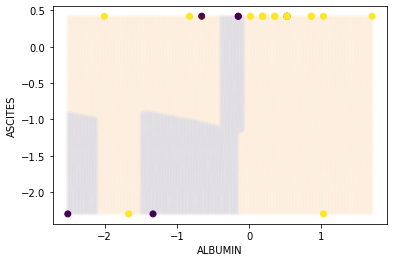

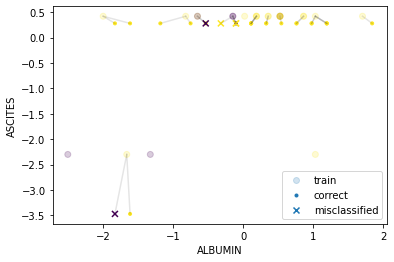

3
0.8148148148148148


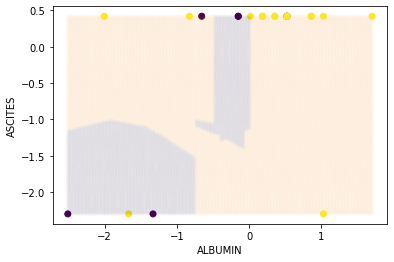

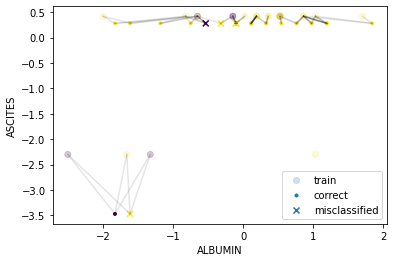

5
0.8148148148148148


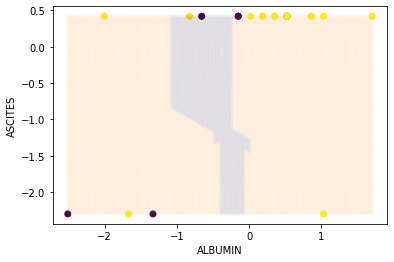

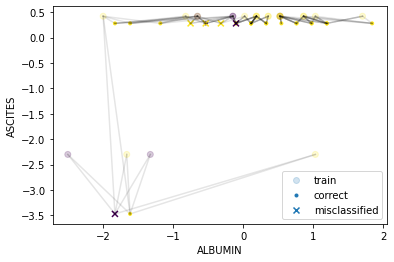

7
0.8888888888888888


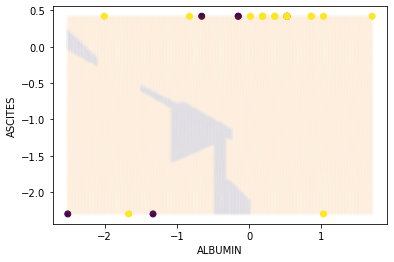

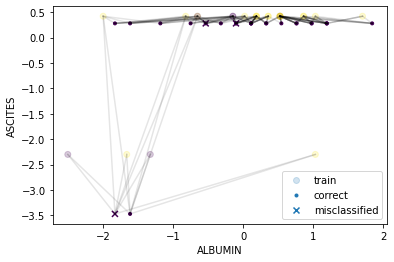

In [ ]:
# decision boundaries for KNN hepatitis
hx_train, hy_train = stdzed_hxhctr[["ALBUMIN","ASCITES"]], h_y_train #slices the first two columns or features from the data
hx_test, hy_test = stdzed_hxhcte[["ALBUMIN","ASCITES"]], h_y_test #slices the first two columns or features from the data

#we can make the grid finer by increasing the number of samples from 200 to higher value
# compare two features
x0v = np.linspace(np.min(hx_train.iloc[:,0]), np.max(hx_train.iloc[:,0]), 200)
x1v = np.linspace(np.min(hx_train.iloc[:,1]), np.max(hx_train.iloc[:,1]), 200)

# print(np.min(hepatitis_x.iloc[:,0]))
# print(np.max(hepatitis_x.iloc[:,0]))
# print(np.min(hepatitis_x.iloc[:,1]))
# print(np.max(hepatitis_x.iloc[:,1]))

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
x_all = pd.DataFrame(x_all, columns= ['x0','x1'])
#print (x_all)
for k in [1, 3, 5, 7]:
    print(k)
    model = KNN()

    # hy_train_prob = np.ones((hy_train.shape[0], 2)) # np.zeros in messidor
    # hy_train_prob[np.arange(hy_train.shape[0]), hy_train.values -1] = 2
   
   # print ((hy_train_prob))
    hy_prob,hy_pred, hknns = model.fit(hx_train, hy_train, k).predict(hx_test)
    
    correct = hy_test == hy_pred
    incorrect = np.logical_not(correct)    
     
    acc = evaluate_acc(hy_pred, hy_test)
    print(acc)
    

    #to get class probability of all the points in the 2D grid
    hy_prob_all, hy_pred_all, _ = model.fit(hx_train, hy_train, k).predict(x_all)

    # y_pred_all = np.zeros_like(y_prob_all)
    # y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    
    hx_train_num = hx_train.to_numpy()
    hy_train_num = hy_train.to_numpy()
    hx_test_num = hx_test.to_numpy()
    hy_test_num = hy_test.to_numpy()
    plt.clf()
    plt.scatter(hx_train_num[:,0], hx_train_num[:,1], c= hy_train, marker='o', alpha=1) 
#     plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
#     plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
#     plt.scatter(x_test[:,0], x_test[:,1], c=y_pred, marker='s')
#     plt.savefig('prediction_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight')
    x_all_num = x_all.to_numpy()
    plt.scatter(x_all_num[:,0], x_all_num[:,1], c=hy_pred_all, marker='.', alpha=0.01) 
    plt.ylabel('ASCITES')
    plt.xlabel('ALBUMIN')
    plt.show()
    
    
    #connect each node to k-nearest neighbours in the training set
    #visualization of the points
    plt.clf()
    
    plt.scatter(hx_train_num[:,0], hx_train_num[:,1], c=hy_train_num, marker='o', alpha=.2, label='train')
    plt.scatter(hx_test_num[correct,0], hx_test_num[correct,1], marker='.', c=hy_pred[correct], label='correct')
    plt.scatter(hx_test_num[incorrect,0], hx_test_num[incorrect,1], marker='x', c=hy_test_num[incorrect], label='misclassified')

    for i in range(hx_test.shape[0]):
        for myk in range(model.K):
            hor = hx_test_num[i,0], hx_train_num[hknns[i,myk],0]
            ver = hx_test_num[i,1], hx_train_num[hknns[i,myk],1]
            plt.plot(hor, ver, 'k-', alpha=.1)

    plt.ylabel('ASCITES')
    plt.xlabel('ALBUMIN')
    plt.legend()
    plt.show()

### KNN - Messidor

1
0.5918367346938775


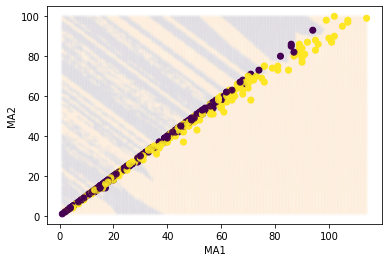

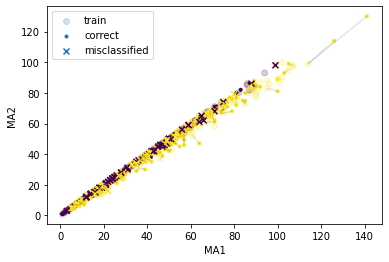

3
0.6326530612244898


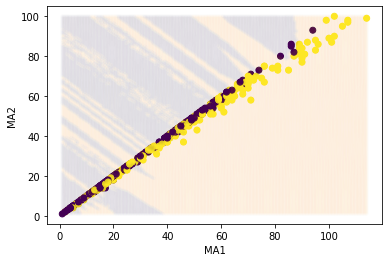

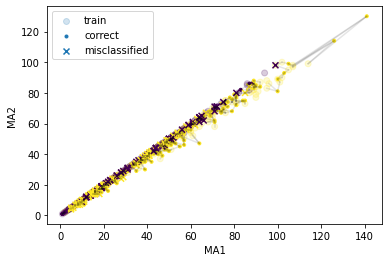

5
0.6352040816326531


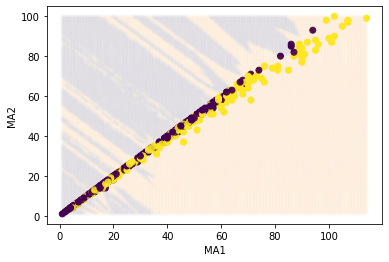

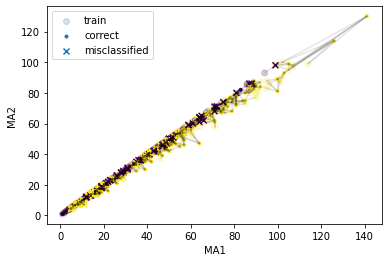

7
0.6377551020408163


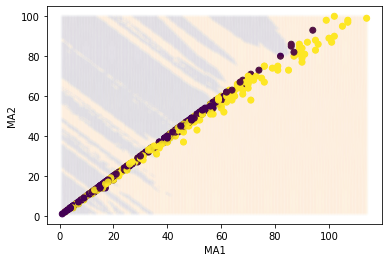

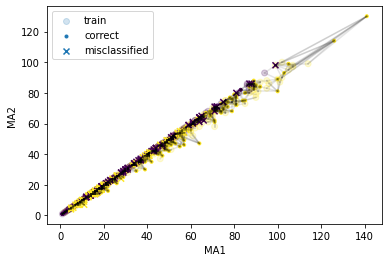

In [ ]:
# decision boundaries for KNN (messidor)
mx_train, my_train = mx_high_corr_train[['MA1','MA2']], m_y_train #slices the first two columns or features from the data
mx_test, my_test = mx_high_corr_test[['MA1','MA2']], m_y_test #slices the first two columns or features from the data

#we can make the grid finer by increasing the number of samples from 200 to higher value
# compare first two features
mx0v = np.linspace(np.min(mx_train.iloc[:,0]), np.max(mx_train.iloc[:,0]), 200)
mx1v = np.linspace(np.min(mx_train.iloc[:,1]), np.max(mx_train.iloc[:,1]), 200)

# print(np.min(hepatitis_x.iloc[:,0]))
# print(np.max(hepatitis_x.iloc[:,0]))
# print(np.min(hepatitis_x.iloc[:,1]))
# print(np.max(hepatitis_x.iloc[:,1]))

# to features values as a mesh  
mx0, mx1 = np.meshgrid(mx0v, mx1v)
mx_all = np.vstack((mx0.ravel(),mx1.ravel())).T
mx_all = pd.DataFrame(mx_all, columns= ['x0','x1'])
#print (x_all)
for k in [1, 3, 5, 7]:
    print(k)
    model = KNN()

    # my_train_prob = np.ones((my_train.shape[0], 2)) # np.zeros in messidor
    # my_train_prob[np.arange(my_train.shape[0]), my_train.values -1] = 2
   
   # print ((hy_train_prob))
    my_prob,my_pred, mknns = model.fit(mx_train, my_train, k).predict(mx_test)
    
    correct = my_test == my_pred
    incorrect = np.logical_not(correct)    
     
    m_acc = evaluate_acc(my_pred, my_test)
    print(m_acc)
    

    #to get class probability of all the points in the 2D grid
    my_prob_all, my_pred_all, _ = model.fit(mx_train, my_train, k).predict(mx_all)

    # y_pred_all = np.zeros_like(y_prob_all)
    # y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    
    mx_train_num = mx_train.to_numpy()
    my_train_num = my_train.to_numpy()
    mx_test_num = mx_test.to_numpy()
    my_test_num = my_test.to_numpy()
    plt.clf()
    plt.scatter(mx_train_num[:,0], mx_train_num[:,1], c= my_train, marker='o', alpha=1) 
#     plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
#     plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
#     plt.scatter(x_test[:,0], x_test[:,1], c=y_pred, marker='s')
#     plt.savefig('prediction_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight')
    mx_all_num = mx_all.to_numpy()
    plt.scatter(mx_all_num[:,0], mx_all_num[:,1], c=my_pred_all, marker='.', alpha=0.01) 
    plt.ylabel('MA2')
    plt.xlabel('MA1')
    plt.show()
    
    
    #connect each node to k-nearest neighbours in the training set
    #visualization of the points
    plt.clf()
    
    plt.scatter(mx_train_num[:,0], mx_train_num[:,1], c=my_train_num, marker='o', alpha=.2, label='train')
    plt.scatter(mx_test_num[correct,0], mx_test_num[correct,1], marker='.', c=my_pred[correct], label='correct')
    plt.scatter(mx_test_num[incorrect,0], mx_test_num[incorrect,1], marker='x', c=my_test_num[incorrect], label='misclassified')

    for i in range(mx_test.shape[0]):
        for myk in range(model.K):
            hor = mx_test_num[i,0], mx_train_num[mknns[i,myk],0]
            ver = mx_test_num[i,1], mx_train_num[mknns[i,myk],1]
            plt.plot(hor, ver, 'k-', alpha=.1)

    plt.ylabel('MA2')
    plt.xlabel('MA1')
    plt.legend()
    plt.show()

### Decision Tree - Hepatitis

Accuracy: 0.8888888888888888


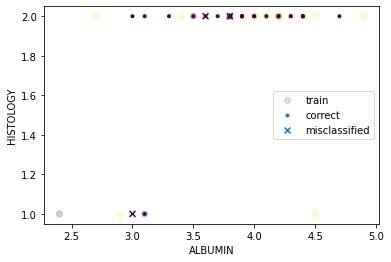

In [ ]:
# decision boundaries for hepatitis (DT)
hx_train, hy_train = hx_high_corr_train[["ALBUMIN","ASCITES"]], h_y_train #slices the first two columns or features from the data
hx_test, hy_test = hx_high_corr_test[["ALBUMIN","ASCITES"]], h_y_test #slices the first two columns or features from the data

tree = DecisionTree(2, 1, cost_misclassification, 1)
hprobs_test, hy_pred = tree.fit(hx_train, hy_train).predict(hx_test)

h_acc = evaluate_acc(hy_pred, hy_test)
print("Accuracy: " + str(h_acc))
hx_train_num = hx_train.to_numpy()
hy_train_num = hy_train.to_numpy()
hx_test_num = hx_test.to_numpy()
hy_test_num = hy_test.to_numpy()

#visualization
correct = hy_test == hy_pred
incorrect = np.logical_not(correct)
plt.scatter(hx_train_num[:,0], hx_train_num[:,1], c=h_y_train, marker='o', alpha=.2, label='train')
plt.scatter(hx_test_num[correct,0], hx_test_num[correct,1], marker='.', c=hy_pred[correct], label='correct')
plt.scatter(hx_test_num[incorrect,0], hx_test_num[incorrect,1], marker='x', c=hy_test[incorrect], label='misclassified')
plt.ylabel('HISTOLOGY')
plt.xlabel('ALBUMIN')
plt.legend()
plt.show()

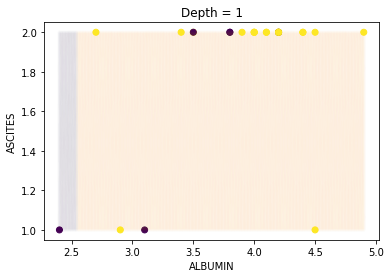

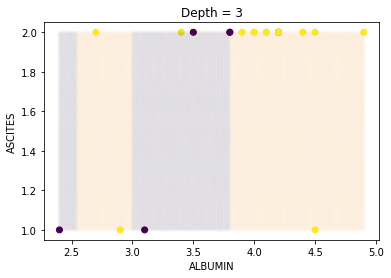

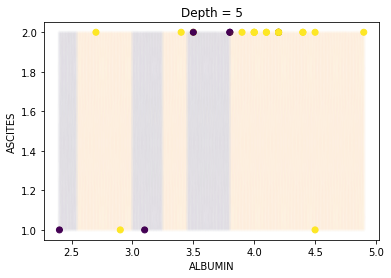

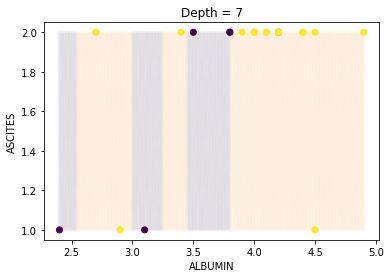

In [ ]:
x0v = np.linspace(np.min(hx_train.iloc[:,0]), np.max(hx_train.iloc[:,0]), 200)
x1v = np.linspace(np.min(hx_train.iloc[:,1]), np.max(hx_train.iloc[:,1]), 200)

x0, x1 = np.meshgrid(x0v, x1v)
hx_all = np.vstack((x0.ravel(),x1.ravel())).T
hx_all = pd.DataFrame(hx_all, columns= ["ALBUMIN","ASCITES"])
hx_all_num = hx_all.to_numpy()
for tree_depth in [1,3,5,7]:
    model = DecisionTree(2, tree_depth, cost_misclassification, 1) 
    # y_train_prob = np.ones((hy_train.shape[0], 2))
    # y_train_prob[np.arange(hy_train.shape[0]), hy_train-1] = 2

    hy_prob_all, hy_pred_all = model.fit(hx_train, hy_train).predict(hx_all)

    plt.scatter(hx_train_num[:,0], hx_train_num[:,1], c=hy_train, marker='o', alpha=1)
    plt.scatter(hx_all_num[:,0], hx_all_num[:,1], c=hy_pred_all, marker='.', alpha=.01)
    plt.ylabel('ASCITES')
    plt.xlabel('ALBUMIN')
    plt.title('Depth = ' + str(tree_depth))
    plt.show()
   # plt.savefig('Hepatitis_tree_depth' + str(tree_depth) + '.png', bbox_inches="tight", dpi=300)

### Decision Tree - Messidor

0.5612244897959183


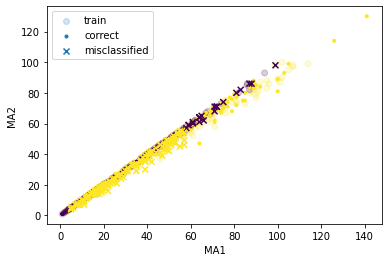

In [ ]:
# decision boundaries for messidors (DT) 
mx_train, my_train = mx_high_corr_train[["MA1","MA2"]], m_y_train #slices the first two columns or features from the data
mx_test, my_test = mx_high_corr_test[["MA1","MA2"]], m_y_test #slices the first two columns or features from the data

tree = DecisionTreeHuge(2, 1, cost_misclassification, 1)
probs_test, my_pred = tree.fit(mx_train, my_train).predict(mx_test)

m_acc = evaluate_acc(my_pred, my_test)
print(m_acc)
# change train and test to numpy
mx_train_num = mx_train.to_numpy()
my_train_num = my_train.to_numpy()
mx_test_num = mx_test.to_numpy()
my_test_num = my_test.to_numpy()

#visualization
correct = my_test == my_pred
incorrect = np.logical_not(correct)
plt.scatter(mx_train_num[:,0], mx_train_num[:,1], c=m_y_train, marker='o', alpha=.2, label='train')
plt.scatter(mx_test_num[correct,0], mx_test_num[correct,1], marker='.', c=my_pred[correct], label='correct')
plt.scatter(mx_test_num[incorrect,0], mx_test_num[incorrect,1], marker='x', c=my_test[incorrect], label='misclassified')
plt.ylabel('MA2')
plt.xlabel('MA1')
plt.legend()
plt.show()

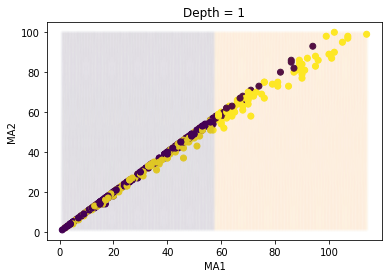

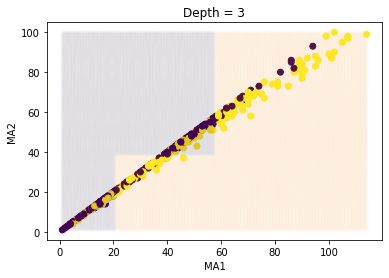

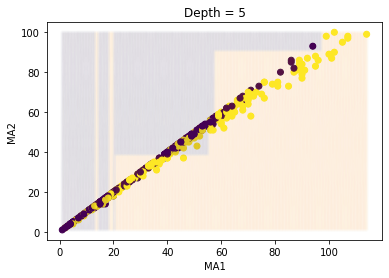

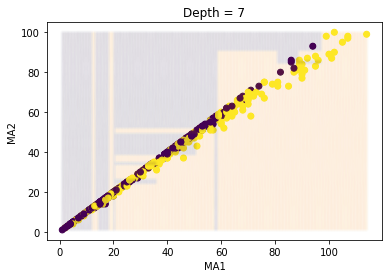

In [ ]:
#make the grid finer by increasing the number of samples to 200 
mx0v = np.linspace(np.min(mx_train.iloc[:,0]), np.max(mx_train.iloc[:,0]), 200)
mx1v = np.linspace(np.min(mx_train.iloc[:,1]), np.max(mx_train.iloc[:,1]), 200)

mx0, mx1 = np.meshgrid(mx0v, mx1v)
mx_all = np.vstack((mx0.ravel(),mx1.ravel())).T
mx_all = pd.DataFrame(mx_all, columns= ["MA1","MA2"])
mx_all_num = mx_all.to_numpy()
for tree_depth in [1,3,5,7]:
    model = DecisionTreeHuge(2, tree_depth, cost_misclassification, 1) 
    # y_train_prob = np.ones((my_train.shape[0], 2))
    # y_train_prob[np.arange(my_train.shape[0]), my_train-1] = 1

    my_prob_all, my_pred_all = model.fit(mx_train, my_train).predict(mx_all)
    plt.scatter(mx_train_num[:,0], mx_train_num[:,1], c=my_train, marker='o', alpha=1)
    plt.scatter(mx_all_num[:,0], mx_all_num[:,1], c=my_pred_all, marker='.', alpha=.01)
    plt.ylabel('MA2')
    plt.xlabel('MA1')
    plt.title('Depth = ' + str(tree_depth))
    plt.show()
   # plt.savefig('Hepatitis_tree_depth' + str(tree_depth) + '.png', bbox_inches="tight", dpi=300)

# **Model selection and evaluation**

## **Choose the best hyperparater**

### KNN - Hepatitis

best K: 7  test_accuracy: 0.8518518518518519


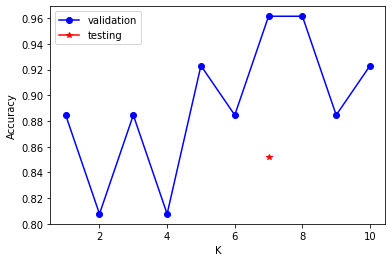

In [ ]:
model_choices=[]
valid_acc = []

n_valid = h_y_val.shape[0]

for k in range(1,11):
    knn = KNN() # create a KNN object (OOP)
    knn.fit(stdzed_hxhctr, h_y_train, k)
    _, y_valid_pred, _ = knn.predict(stdzed_hxhcv)
    accuracy = evaluate_acc(y_valid_pred, h_y_val)
    model_choices.append(k)
    valid_acc.append(accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN()
knn.fit(stdzed_hxhctr, h_y_train, best_valid_K)
_, y_test_pred, _ = knn.predict(stdzed_hxhcte)
test_accuracy = evaluate_acc(y_test_pred, h_y_test)
print("best K: " + str(best_valid_K) + "  test_accuracy: " + str(test_accuracy))

plt.clf()
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')

plt.show()

Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
best K: 7  test_accuracy: 0.8518518518518519


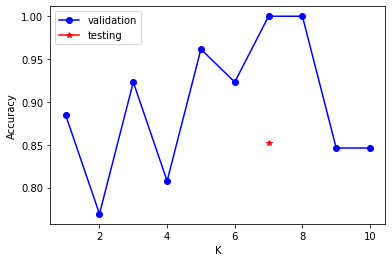

In [ ]:
model_choices=[]
valid_acc = []

n_valid = h_y_val.shape[0]

for k in range(1,11):
    knn = KNN() # create a KNN object (OOP)
    knn.switch_dist_fn()
    knn.fit(stdzed_hxhctr, h_y_train, k)
    _, y_valid_pred, _ = knn.predict(stdzed_hxhcv)
    accuracy = evaluate_acc(y_valid_pred, h_y_val)
    model_choices.append(k)
    valid_acc.append(accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN()
knn.fit(stdzed_hxhctr, h_y_train, best_valid_K)
_, y_test_pred, _ = knn.predict(stdzed_hxhcte)
test_accuracy = evaluate_acc(y_test_pred, h_y_test)
print("best K: " + str(best_valid_K) + "  test_accuracy: " + str(test_accuracy))

plt.clf()
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')

plt.show()

### KNN - Messidor

best K: 7  test_accuracy: 0.6224489795918368


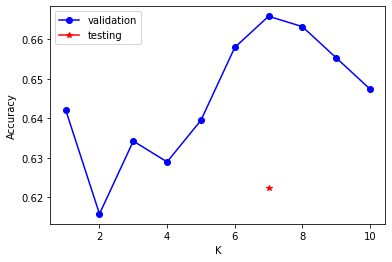

In [ ]:
model_choices=[]
valid_acc = []

n_valid = m_y_val.shape[0]

for k in range(1,11):
    knn = KNN() # create a KNN object (OOP)
    knn.fit(mx_high_corr_train, m_y_train, k)
    _, y_valid_pred, _ = knn.predict(mx_high_corr_val)
    accuracy = evaluate_acc(y_valid_pred, m_y_val)
    model_choices.append(k)
    valid_acc.append(accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN()
knn.fit(mx_high_corr_train, m_y_train, best_valid_K)
_, y_test_pred, _ = knn.predict(mx_high_corr_test)
test_accuracy = evaluate_acc(y_test_pred, m_y_test)
print("best K: " + str(best_valid_K) + "  test_accuracy: " + str(test_accuracy))

plt.clf()
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')

plt.show()

Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
Distance function set to manhattan
best K: 8  test_accuracy: 0.6377551020408163


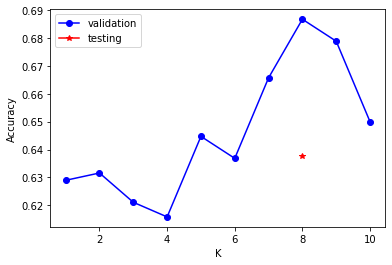

In [ ]:
model_choices=[]
valid_acc = []

n_valid = m_y_val.shape[0]

for k in range(1,11):
    knn = KNN() # create a KNN object (OOP)
    knn.switch_dist_fn()
    knn.fit(mx_high_corr_train, m_y_train, k)
    _, y_valid_pred, _ = knn.predict(mx_high_corr_val)
    accuracy = evaluate_acc(y_valid_pred, m_y_val)
    model_choices.append(k)
    valid_acc.append(accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN()
knn.fit(mx_high_corr_train, m_y_train, best_valid_K)
_, y_test_pred, _ = knn.predict(mx_high_corr_test)
test_accuracy = evaluate_acc(y_test_pred, m_y_test)
print("best K: " + str(best_valid_K) + "  test_accuracy: " + str(test_accuracy))

plt.clf()
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')

plt.show()

### Decision Tree - Hepatitis

cost_fn: cost_misclassfication
best depth = 1, test accuracy = 0.8888888888888888


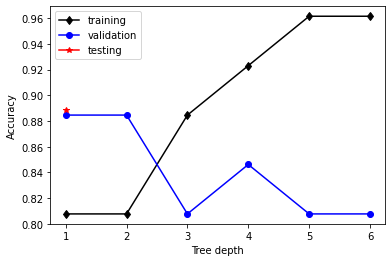

In [ ]:
# Using cost_misclassification as the cost function
hep_model_choices=[]
h_train_acc = []
h_valid_acc = []

h_n_train = h_y_train.shape[0]
h_n_valid = h_y_val.shape[0]

for k in range(1, 7):
    dt = DecisionTree(2, k, cost_misclassification, 1)

    y_train_tr_prob, y_train_tr_pred = dt.fit(hx_high_corr_train_dt, h_y_train).predict(hx_high_corr_train_dt)
    acc_tr = evaluate_acc(y_train_tr_pred, h_y_train)

    y_train_va_prob, y_train_va_pred = dt.fit(hx_high_corr_train_dt, h_y_train).predict(hx_high_corr_val_dt)
    acc_va = evaluate_acc(y_train_va_pred, h_y_val)

    hep_model_choices.append(k)
    h_train_acc.append(acc_tr)
    h_valid_acc.append(acc_va)

# use the best K to predict test data
h_best_depth = hep_model_choices[h_valid_acc.index(max(h_valid_acc))]
dt = DecisionTree(2, h_best_depth, cost_misclassification, 1)
h_y_test_prob, h_y_test_pred = dt.fit(hx_high_corr_train_dt, h_y_train).predict(hx_high_corr_test_dt)
hep_test_accuracy = evaluate_acc(h_y_test_pred, h_y_test)
print("cost_fn: cost_misclassfication")
print(f'best depth = {h_best_depth}, test accuracy = {hep_test_accuracy}')

plt.plot(hep_model_choices, h_train_acc, marker='d', color='black', label='training')
plt.plot(hep_model_choices, h_valid_acc, marker='o', color='blue', label='validation')
plt.plot(h_best_depth, hep_test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

cost_fn: cost_entropy
best depth = 2, test accuracy = 0.9259259259259259


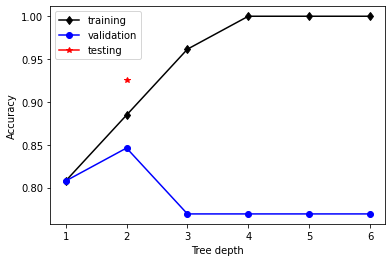

In [ ]:
# Using cost_entropy as the cost function
hep_model_choices=[]
h_train_acc = []
h_valid_acc = []

h_n_train = h_y_train.shape[0]
h_n_valid = h_y_val.shape[0]

for k in range(1, 7):
    dt = DecisionTree(2, k, cost_entropy, 1)

    y_train_tr_prob, y_train_tr_pred = dt.fit(hx_high_corr_train_dt, h_y_train).predict(hx_high_corr_train_dt)
    acc_tr = evaluate_acc(y_train_tr_pred, h_y_train)

    y_train_va_prob, y_train_va_pred = dt.fit(hx_high_corr_train_dt, h_y_train).predict(hx_high_corr_val_dt)
    acc_va = evaluate_acc(y_train_va_pred, h_y_val)

    hep_model_choices.append(k)
    h_train_acc.append(acc_tr)
    h_valid_acc.append(acc_va)

# use the best K to predict test data
h_best_depth = hep_model_choices[h_valid_acc.index(max(h_valid_acc))]
dt = DecisionTree(2, h_best_depth, cost_entropy, 1)
h_y_test_prob, h_y_test_pred = dt.fit(hx_high_corr_train_dt, h_y_train).predict(hx_high_corr_test_dt)
hep_test_accuracy = evaluate_acc(h_y_test_pred, h_y_test)
print("cost_fn: cost_entropy")
print(f'best depth = {h_best_depth}, test accuracy = {hep_test_accuracy}')

plt.plot(hep_model_choices, h_train_acc, marker='d', color='black', label='training')
plt.plot(hep_model_choices, h_valid_acc, marker='o', color='blue', label='validation')
plt.plot(h_best_depth, hep_test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

cost_fn: cost_gini_index
best depth = 2, test accuracy = 0.9259259259259259


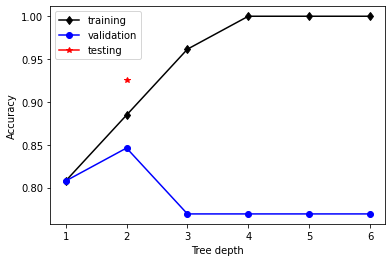

In [ ]:
# Using cost_gini_index as the cost function
hep_model_choices=[]
h_train_acc = []
h_valid_acc = []

h_n_train = h_y_train.shape[0]
h_n_valid = h_y_val.shape[0]

for k in range(1, 7):
    dt = DecisionTree(2, k, cost_gini_index, 1)

    y_train_tr_prob, y_train_tr_pred = dt.fit(hx_high_corr_train_dt, h_y_train).predict(hx_high_corr_train_dt)
    acc_tr = evaluate_acc(y_train_tr_pred, h_y_train)

    y_train_va_prob, y_train_va_pred = dt.fit(hx_high_corr_train_dt, h_y_train).predict(hx_high_corr_val_dt)
    acc_va = evaluate_acc(y_train_va_pred, h_y_val)

    hep_model_choices.append(k)
    h_train_acc.append(acc_tr)
    h_valid_acc.append(acc_va)

# use the best K to predict test data
h_best_depth = hep_model_choices[h_valid_acc.index(max(h_valid_acc))]
dt = DecisionTree(2, h_best_depth, cost_gini_index, 1)
h_y_test_prob, h_y_test_pred = dt.fit(hx_high_corr_train_dt, h_y_train).predict(hx_high_corr_test_dt)
hep_test_accuracy = evaluate_acc(h_y_test_pred, h_y_test)
print("cost_fn: cost_gini_index")
print(f'best depth = {h_best_depth}, test accuracy = {hep_test_accuracy}')

plt.plot(hep_model_choices, h_train_acc, marker='d', color='black', label='training')
plt.plot(hep_model_choices, h_valid_acc, marker='o', color='blue', label='validation')
plt.plot(h_best_depth, hep_test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

### Decision Tree - Messidor

cost_fn = cost_misclassification, best depth = 10, test accuracy = 0.6479591836734694


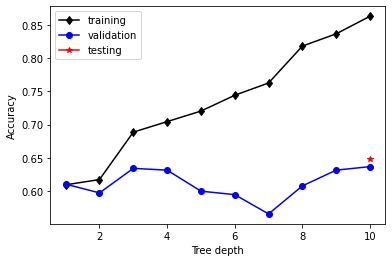

In [ ]:
mess_model_choices=[]
m_train_acc = []
m_valid_acc = []

m_n_train = m_y_train.shape[0]
m_n_valid = m_y_val.shape[0]

for k in range(1, 11):
    dt = DecisionTreeHuge(2, k, cost_misclassification, 1)

    y_train_tr_prob, y_train_tr_pred = dt.fit(mx_high_corr_train_dt, m_y_train).predict(mx_high_corr_train_dt)
    acc_tr = evaluate_acc(y_train_tr_pred, m_y_train)

    y_train_va_prob, y_train_va_pred = dt.fit(mx_high_corr_train_dt, m_y_train).predict(mx_high_corr_val_dt)
    acc_va = evaluate_acc(y_train_va_pred, m_y_val)

    mess_model_choices.append(k)
    m_train_acc.append(acc_tr)
    m_valid_acc.append(acc_va)

# use the best K to predict test data
m_best_depth = mess_model_choices[m_valid_acc.index(max(m_valid_acc))]
dt = DecisionTreeHuge(2, m_best_depth, cost_misclassification, 1)
m_y_test_prob, m_y_test_pred = dt.fit(mx_high_corr_train_dt, m_y_train).predict(mx_high_corr_test_dt)
mess_test_accuracy = evaluate_acc(m_y_test_pred, m_y_test)
print(f'cost_fn = cost_misclassification, best depth = {m_best_depth}, test accuracy = {mess_test_accuracy}')

plt.plot(mess_model_choices, m_train_acc, marker='d', color='black', label='training')
plt.plot(mess_model_choices, m_valid_acc, marker='o', color='blue', label='validation')
plt.plot(m_best_depth, mess_test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

cost_fn = cost_entropy, best depth = 7, test accuracy = 0.6632653061224489


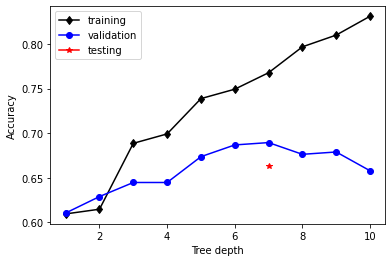

In [ ]:
mess_model_choices=[]
m_train_acc = []
m_valid_acc = []

m_n_train = m_y_train.shape[0]
m_n_valid = m_y_val.shape[0]

for k in range(1, 11):
    dt = DecisionTreeHuge(2, k, cost_entropy, 1)

    y_train_tr_prob, y_train_tr_pred = dt.fit(mx_high_corr_train_dt, m_y_train).predict(mx_high_corr_train_dt)
    acc_tr = evaluate_acc(y_train_tr_pred, m_y_train)

    y_train_va_prob, y_train_va_pred = dt.fit(mx_high_corr_train_dt, m_y_train).predict(mx_high_corr_val_dt)
    acc_va = evaluate_acc(y_train_va_pred, m_y_val)

    mess_model_choices.append(k)
    m_train_acc.append(acc_tr)
    m_valid_acc.append(acc_va)

# use the best K to predict test data
m_best_depth = mess_model_choices[m_valid_acc.index(max(m_valid_acc))]
dt = DecisionTreeHuge(2, m_best_depth, cost_entropy, 1)
m_y_test_prob, m_y_test_pred = dt.fit(mx_high_corr_train_dt, m_y_train).predict(mx_high_corr_test_dt)
mess_test_accuracy = evaluate_acc(m_y_test_pred, m_y_test)
print(f'cost_fn = cost_entropy, best depth = {m_best_depth}, test accuracy = {mess_test_accuracy}')

plt.plot(mess_model_choices, m_train_acc, marker='d', color='black', label='training')
plt.plot(mess_model_choices, m_valid_acc, marker='o', color='blue', label='validation')
plt.plot(m_best_depth, mess_test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

cost_fn = cost_gini_index, best depth = 9, test accuracy = 0.6709183673469388


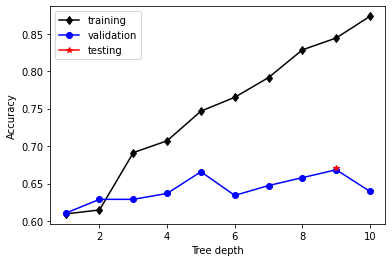

In [ ]:
mess_model_choices=[]
m_train_acc = []
m_valid_acc = []

m_n_train = m_y_train.shape[0]
m_n_valid = m_y_val.shape[0]

for k in range(1, 11):
    dt = DecisionTreeHuge(2, k, cost_gini_index, 1)

    y_train_tr_prob, y_train_tr_pred = dt.fit(mx_high_corr_train_dt, m_y_train).predict(mx_high_corr_train_dt)
    acc_tr = evaluate_acc(y_train_tr_pred, m_y_train)

    y_train_va_prob, y_train_va_pred = dt.fit(mx_high_corr_train_dt, m_y_train).predict(mx_high_corr_val_dt)
    acc_va = evaluate_acc(y_train_va_pred, m_y_val)

    mess_model_choices.append(k)
    m_train_acc.append(acc_tr)
    m_valid_acc.append(acc_va)

# use the best K to predict test data
m_best_depth = mess_model_choices[m_valid_acc.index(max(m_valid_acc))]
dt = DecisionTreeHuge(2, m_best_depth, cost_gini_index, 1)
m_y_test_prob, m_y_test_pred = dt.fit(mx_high_corr_train_dt, m_y_train).predict(mx_high_corr_test_dt)
mess_test_accuracy = evaluate_acc(m_y_test_pred, m_y_test)
print(f'cost_fn = cost_gini_index, best depth = {m_best_depth}, test accuracy = {mess_test_accuracy}')

plt.plot(mess_model_choices, m_train_acc, marker='d', color='black', label='training')
plt.plot(mess_model_choices, m_valid_acc, marker='o', color='blue', label='validation')
plt.plot(m_best_depth, mess_test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

## **ROC Curve**

### KNN - Hepatitis

Test accuracy is 0.8518518518518519
ROC AUC score is  0.8819444444444446


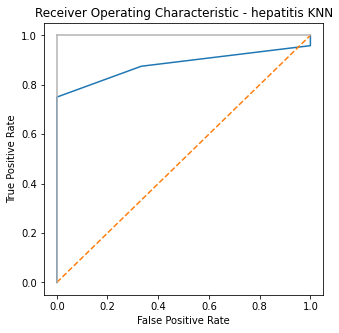

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
model = KNN ()
clf = model.fit(stdzed_hxhctr, h_y_train, 7)
roc_h_y_prob, roc_h_y_pred, h_y_neighbors = clf.predict(stdzed_hxhcte)
print("Test accuracy is " + str(evaluate_acc(roc_h_y_pred, h_y_test)))


h_fpr, h_tpr, thresholds = roc_curve(h_y_test, roc_h_y_prob[:,1], pos_label = 2)
roc_auc_h = roc_auc_score(h_y_test, roc_h_y_prob[:,1])
print ("ROC AUC score is " ,roc_auc_h)

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - hepatitis KNN')
plt.plot(h_fpr, h_tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Distance function set to manhattan
Test accuracy is 0.8518518518518519
ROC AUC score is  0.9097222222222221


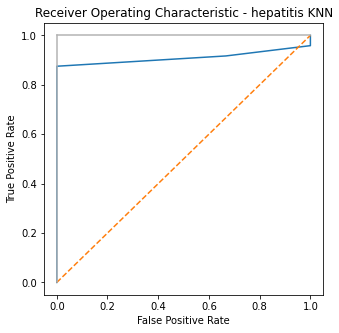

In [ ]:
model = KNN ()
model.switch_dist_fn()
clf = model.fit(stdzed_hxhctr, h_y_train, 7)
roc_h_y_prob, roc_h_y_pred, h_y_neighbors = clf.predict(stdzed_hxhcte)
print("Test accuracy is " + str(evaluate_acc(roc_h_y_pred, h_y_test)))


h_fpr, h_tpr, thresholds = roc_curve(h_y_test, roc_h_y_prob[:,1], pos_label = 2)
roc_auc_h = roc_auc_score(h_y_test, roc_h_y_prob[:,1])
print ("ROC AUC score is " ,roc_auc_h)

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - hepatitis KNN')
plt.plot(h_fpr, h_tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#plt.savefig("hepatitis_roc_curve.png",bbox_inches='tight', dpi=300)

### KNN - Messidor

Distance function set to manhattan
Test accuracy is 0.6428571428571429
ROC AUC score is  0.7008457489984552


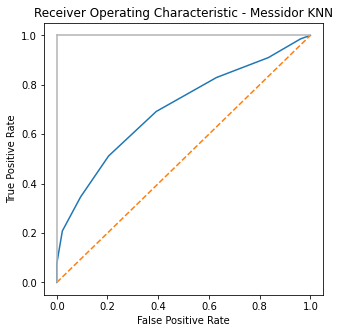

In [ ]:
model = KNN ()
model.switch_dist_fn()
m_clf = model.fit(mx_high_corr_train, m_y_train, 8)
roc_m_y_prob, roc_m_y_pred, m_y_neighbors = m_clf.predict(mx_high_corr_test)
print("Test accuracy is " + str(evaluate_acc(roc_m_y_pred,m_y_test)))

m_fpr, m_tpr, m_thresholds = roc_curve(m_y_test, roc_m_y_prob[:,1])
roc_auc_m = roc_auc_score(m_y_test, roc_m_y_prob[:,1])
print ("ROC AUC score is " ,roc_auc_m)

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Messidor KNN')
plt.plot(m_fpr, m_tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree - Hepatitis

Test accuracy is 0.9259259259259259
ROC AUC score is  0.9583333333333333


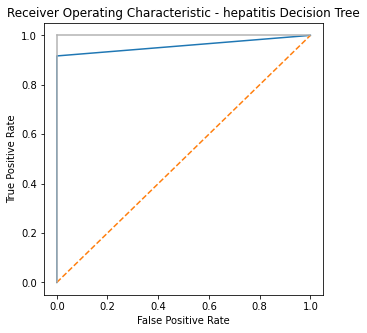

In [ ]:
#for hepatitis
# using cost_entropy
tree = DecisionTree(2, 2, cost_entropy, 1) 
dt = tree.fit(hx_high_corr_train_dt, h_y_train)
roc_cb, roc_h1_y_pred = dt.predict(hx_high_corr_test_dt)

print("Test accuracy is " + str(evaluate_acc(roc_h1_y_pred, h_y_test)))

h1_fpr, h1_tpr, thresholds = roc_curve(h_y_test, roc_cb[:,1], pos_label = 2)
roc_auc_h1 = roc_auc_score(h_y_test, roc_cb[:,1])
print ("ROC AUC score is " ,roc_auc_h1)

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - hepatitis Decision Tree')
plt.plot(h1_fpr, h1_tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Test accuracy is 0.9259259259259259
ROC AUC score is  0.9583333333333333


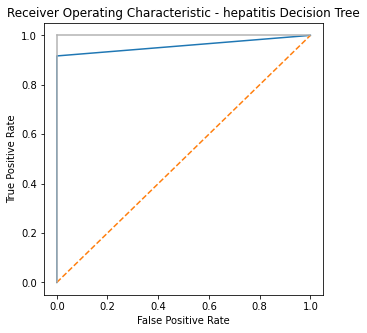

In [ ]:
# using cost_gini_index
tree = DecisionTree(2, 2, cost_gini_index, 1) 
dt = tree.fit(hx_high_corr_train_dt, h_y_train)
roc_cb, roc_h1_y_pred = dt.predict(hx_high_corr_test_dt)

print("Test accuracy is " + str(evaluate_acc(roc_h1_y_pred, h_y_test)))

h1_fpr, h1_tpr, thresholds = roc_curve(h_y_test, roc_cb[:,1], pos_label = 2)
roc_auc_h1 = roc_auc_score(h_y_test, roc_cb[:,1])
print ("ROC AUC score is " ,roc_auc_h1)

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - hepatitis Decision Tree')
plt.plot(h1_fpr, h1_tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# cost_gini_index shows similar result as cost_entropy

### Decision Tree - Messidor

Test accuracy is 0.6709183673469388
ROC AUC score is  0.6875441858029379


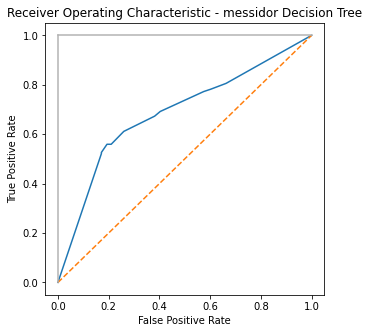

In [ ]:
#for messidor
tree = DecisionTreeHuge(2, 9, cost_gini_index, 1) # i =1(misclass), 1(entropy), 1(gini index)
m_dt = tree.fit(mx_high_corr_train_dt, m_y_train)
m_roc_cb, roc_m1_y_pred = m_dt.predict(mx_high_corr_test_dt)

print("Test accuracy is " + str(evaluate_acc(roc_m1_y_pred, m_y_test)))

m1_fpr, m1_tpr, thresholds = roc_curve(m_y_test, m_roc_cb[:,1])
roc_auc_m1 = roc_auc_score(m_y_test, m_roc_cb[:,1])
print ("ROC AUC score is " ,roc_auc_m1)

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - messidor Decision Tree')
plt.plot(m1_fpr, m1_tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()